In [245]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline

import shapefile as shp
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [246]:
df_navent = pd.read_csv('data/train.csv', dtype={'tipodepropiedad':'category', 'ciudad':'category', 'provincia':'category', 'id':'int32', 'antiguedad':'float16', 'habitaciones':'float16', 'garages':'float16', 'banos':'float16', 'metroscubiertos':'float16', 'metrostotales':'float16', 'idzona':'float16', 'lat':'float16', 'lng':'float16', 'gimnasio':'bool', 'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool', 'centroscomercialescercanos':'bool'}, parse_dates=['fecha'])

In [247]:
precios_dolares = pd.read_csv('../data/precios_en_dolares.csv')

In [248]:
df_navent = df_navent.merge(precios_dolares, how='left')

In [249]:
del precios_dolares

## Cloropleth de ciudades

Arranque haciendo con geopandas pero el gráfico no se hacía asi que para el gráfico cambié a basemap 

Los shapefiles se obtienen de: https://esoc.princeton.edu/file-type/gis-data#Mexico (Municipalidades)

In [302]:
fp = 'data/shp/Mexican_Municipalities/Mexican Municipalities.shp'
df_map = gpd.read_file(fp)[['NOM_MUN','geometry']].to_crs('+proj=robin')
df_map = df_map.rename(columns={'NOM_MUN': 'ciudad'})

In [303]:
df_map.head()

ciudad                                           geometry
0                 Tlalpan  POLYGON ((-9215889.724437028 2064426.635349321...
1              Xochimilco  POLYGON ((-9211408.535305906 2054553.856774347...
2  La Magdalena Contreras  POLYGON ((-9220773.891009877 2061624.955241656...
3            Azcapotzalco  POLYGON ((-9209090.556132214 2085864.636927485...
4            Benito Jurez  POLYGON ((-9210091.704231462 2070291.536902894...

In [304]:
df_map_ciudad = df_map[['ciudad']].copy()

In [305]:
df_map_ciudad.head(2)

ciudad
0     Tlalpan
1  Xochimilco

In [306]:
#saco tildes para matchear con shapefile
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"á", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"é", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"í", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ó", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ú", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ñ", "")

In [307]:
idx1 = pd.Index(df_navent.ciudad)
idx2 = pd.Index(df_map_ciudad.ciudad)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan, 'Bacalar', 'Cancn', 'Chetumal', 'Juchitn de Zaragoza',
       'Playa del Carmen', 'Villahermosa', 'otra'], dtype=object)

### Respecto de esto hay algunas ciudades que como no tener tildes hubo que examinar cuales si estaban en el shapefile que da la forma del mapa

Con str contains y startwith se vio cuales estaban:

In [308]:
df_map.loc[df_map["ciudad"].str.startswith('') &
           df_map['ciudad'].str.contains('lleza') &
            df_map['ciudad'].str.contains(''),:] 

ciudad                                           geometry
700  Balleza  POLYGON ((-9770979.311411895 2910077.414312544...

### No descubiertos y que concluyo que no están en el shapefile:
Villahermosa -
<br>
Cancn -
<br>
Juchitn de Zaragoza -
<br>
Playa del Carmen -
<br>
Chetumal -
<br>
Bacalar -
<br>
Otra - Es otra, no es una ciudad
<br>
### Descubiertos:
Alamo Temapache - Alamos (SHP)
<br>
Alvaro Obregn - lvaro Obregn (SHP)
<br>
AnAhuac - Anhuac (SHP)
<br>
ApetatitlAn de Antonio Carvajal - Apetatitln de Antonio Carvajal (SHP)
<br>
Atoyac de Alvarez - Atoyac de lvarez (SHP)
<br>
Chilapa de Alvarez - Chilapa de lvarez (SHP)
<br>
CopAndaro - Copndaro (SHP)
<br>
Pachuca - Pachuca de Soto (SHP)
<br>
PolotitlAn - Polotitln (SHP)
<br>
PuruAndiro - Purundiro (SHP)
<br>
TacAmbaro - Tacmbaro (SHP)
<br>
TlaltizapAn de Zapata - Tlaltizapn (SHP)
<br>
Villa de Alvarez - Villa de lvarez (SHP)
<br>
Yauhquemecan - Yauhquemehcan (SHP)
<br>
Zimatln de Alvarez - Zimatln de lvarez (SHP)
<br>
ZirAndaro - Zirndaro (SHP)
<br>
catln - Acatln (SHP)
<br>
catln de Jurez - Acatln de Jurez (SHP)
<br>
caxochitln - Acaxochitln (SHP)
<br>
cmbaro - Acmbaro (SHP)
<br>
utln de Navarro - Autln de Navarro (SHP)
<br>
yotln - Ayotln (SHP)

In [309]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['ciudad'] = df_navent['ciudad'].replace({"Alamo Temapache": "Alamos"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Alvaro Obregn": "lvaro Obregn"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"AnAhuac": "Anhuac"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"ApetatitlAn de Antonio Carvajal": "Apetatitln de Antonio Carvajal"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Atoyac de Alvarez": "Atoyac de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Chilapa de Alvarez": "Chilapa de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"CopAndaro": "Copndaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Pachuca": "Pachuca de Soto"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"PolotitlAn": "Polotitln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"PuruAndiro": "Purundiro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"TlaltizapAn de Zapata": "Tlaltizapn"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Villa de Alvarez": "Villa de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Yauhquemecan": "Yauhquemehcan"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Zimatln de Alvarez": "Zimatln de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"ZirAndaro": "Zirndaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"catln de Jurez": "Acatln de Jurez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"caxochitln": "Acaxochitln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"utln de Navarro": "Autln de Navarro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"yotln": "Ayotln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"cmbaro": "Acmbaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"TacAmbaro": "Tacmbaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({'catln':'Acatln'})

In [310]:
df_navent_ciudad = df_navent[['id','ciudad']].copy()

In [311]:
df_navent_ciudad = df_navent_ciudad.groupby('ciudad').agg(np.size).sort_values(by="id",ascending=False).rename(columns={'id': 'cantidad'}).reset_index()

In [312]:
df_navent_ciudad.head()

ciudad  cantidad
0        Quertaro     12646
1    Benito Jurez     11014
2         Zapopan     10360
3  San Luis Potos      7925
4           Mrida      7162

/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


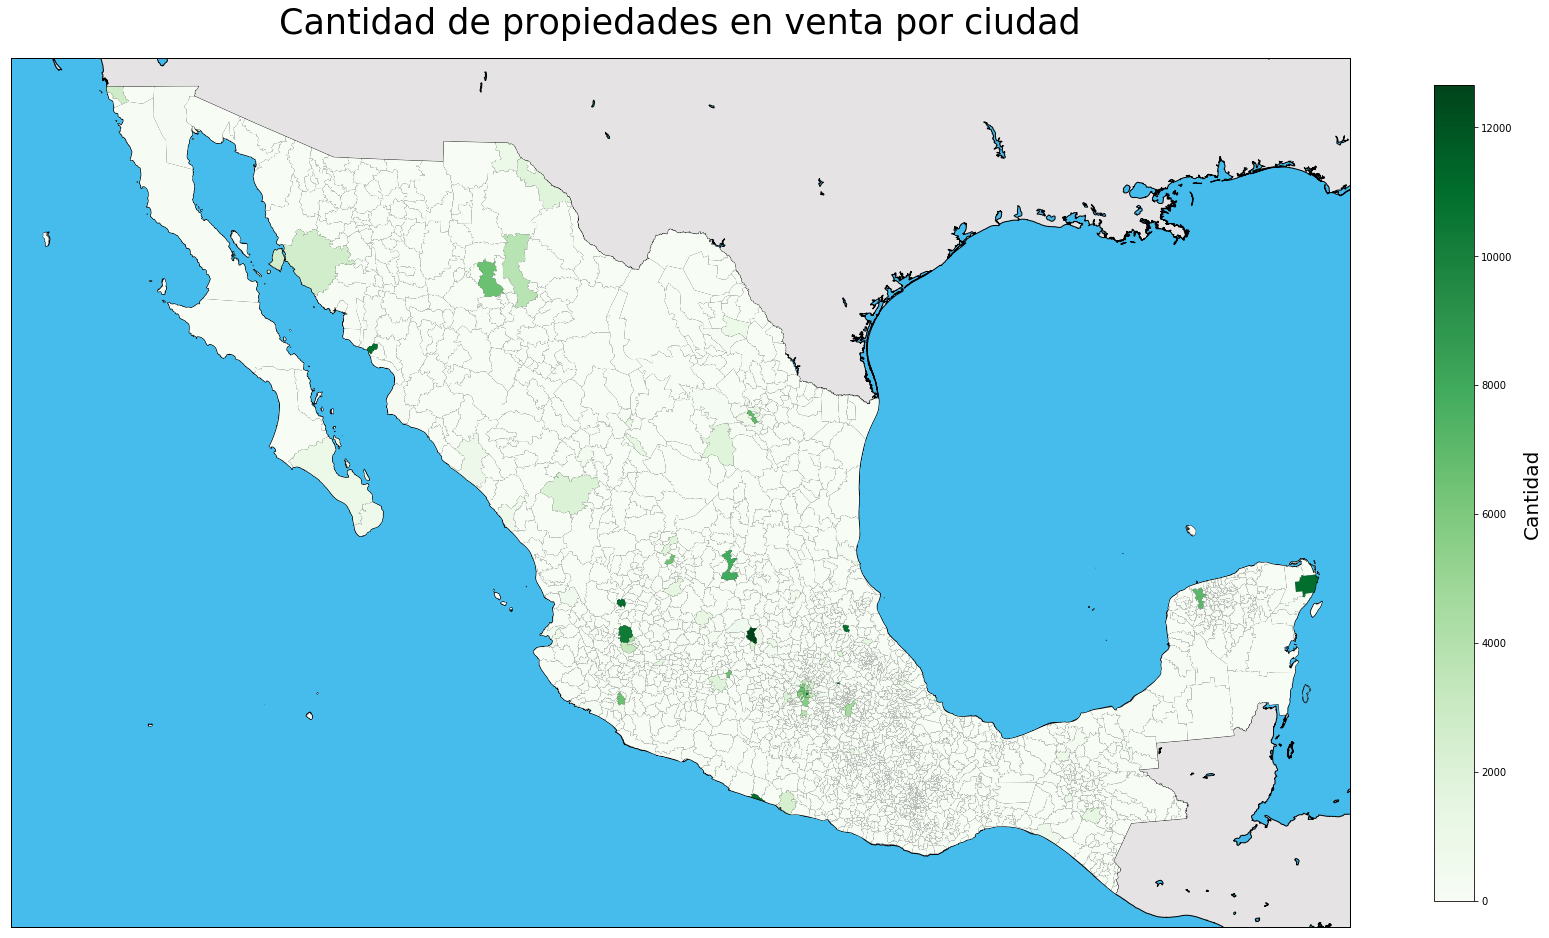

In [313]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_Municipalities/Mexican Municipalities','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'ciudad': [ciudad['NOM_MUN'] for ciudad in mexicoMap.shapefile_info]
    })

merge_ciudad_and_map = df_map_shp.merge(df_navent_ciudad, on='ciudad', how='left')


#fig configuration
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(merge_ciudad_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_ciudad_and_map['cantidad'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_ciudad_and_map['cantidad'])

cbar = plt.colorbar(mapper, shrink=0.5)
cbar.set_label('Cantidad',fontsize=20,labelpad=10)

plt.title("Cantidad de propiedades en venta por ciudad",fontsize=35,pad=25)
plt.savefig('img/cant_prop_en_venta_ciudad.png',bbox_inches = 'tight')
plt.show()

## Cloropleth de provincias

In [314]:
fp2 = 'data/shp/Mexican_States/Mexican States.shp'
df_map_2 = gpd.read_file(fp2)[['NOM_ENT','geometry']].to_crs('+proj=robin')
df_map_2 = df_map_2.rename(columns={'NOM_ENT': 'provincia'})

In [315]:
df_map_provincia = df_map_2[['provincia']].copy()

In [316]:
#saco tildes para matchear con shapefile
df_navent['provincia'] = df_navent['provincia'].str.replace(u"á", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"é", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"í", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ó", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ú", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ñ", "")

In [317]:
idx1 = pd.Index(df_navent.provincia)
idx2 = pd.Index(df_map_provincia.provincia)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan], dtype=object)

In [318]:
df_map_2.loc[df_map_2["provincia"].str.startswith('Baja') &
            df_map_2['provincia'].str.contains('alifornia') &
            df_map_2['provincia'].str.contains(''),:]

provincia                                           geometry
5      Baja California  (POLYGON ((-10267308.38027523 3039426.90017507...
7  Baja California Sur  (POLYGON ((-10145912.8575157 2446511.567166308...

### Descubiertos:
Coahuila - Coahuila de Zaragoza (SHP)
<br>
Michoacn - Michoacn de Ocampo (SHP)
<br>
San luis Potos - San Luis Potos (SHP)
<br>
Veracruz - Veracruz de Ignacio de la Llave (SHP)
<br>
Edo. de Mxico - Mxico (SHP)
<br>
Baja California Norte - Baja California (SHP)

In [319]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['provincia'] = df_navent['provincia'].replace({"Coahuila": "Coahuila de Zaragoza"})
df_navent['provincia'] = df_navent['provincia'].replace({"Michoacn": "Michoacn de Ocampo"})
df_navent['provincia'] = df_navent['provincia'].replace({"San luis Potos": "San Luis Potos"})
df_navent['provincia'] = df_navent['provincia'].replace({"Veracruz": "Veracruz de Ignacio de la Llave"})
df_navent['provincia'] = df_navent['provincia'].replace({"Edo. de Mxico": "Mxico"})
df_navent['provincia'] = df_navent['provincia'].replace({"Baja California Norte": "Baja California"})

In [320]:
df_navent_provincia = df_navent[['id','provincia']].copy()

In [321]:
df_navent_provincia = df_navent_provincia.groupby('provincia').agg(np.size).sort_values(by="id",ascending=False).rename(columns={'id': 'cantidad'}).reset_index()

In [322]:
df_navent_provincia.head()

provincia  cantidad
0  Distrito Federal     58790
1             Mxico     41607
2           Jalisco     21238
3          Quertaro     16988
4         Nuevo Len     15324

/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


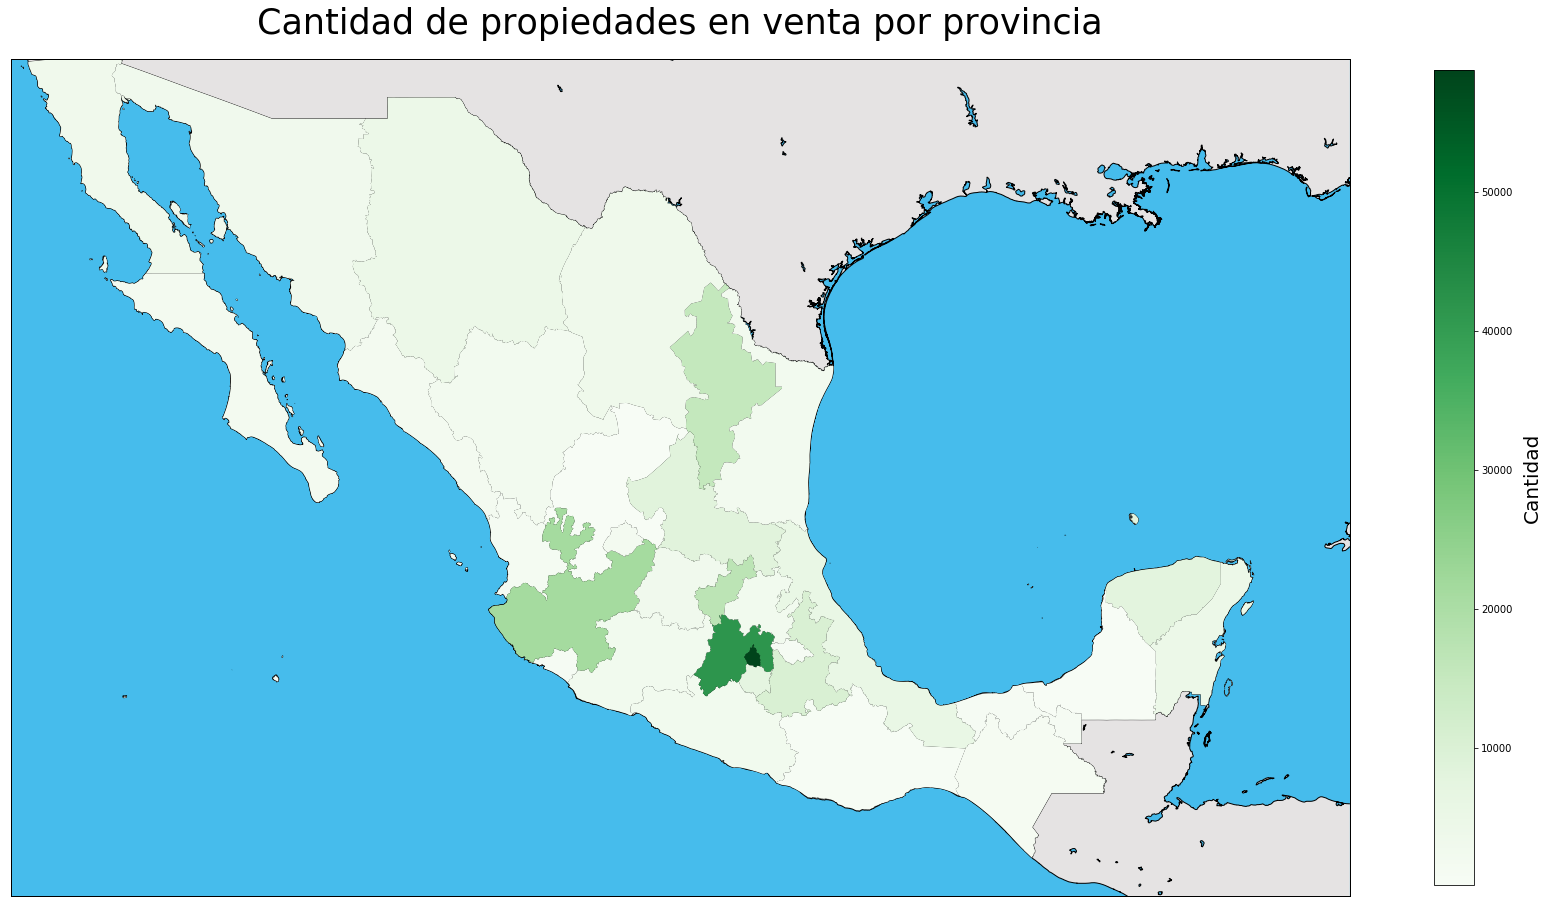

In [323]:
import warnings
warnings.filterwarnings(action='once')

from shapely.geometry import Point, MultiPoint, MultiPolygon

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='merc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp_provincia = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'provincia': [provincia['NOM_ENT'] for provincia in mexicoMap.shapefile_info]
    })

merge_provincia_and_map = df_map_shp_provincia.merge(df_navent_provincia, on='provincia', how='left')

#fig configuration
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(merge_provincia_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_provincia_and_map['cantidad'].values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_provincia_and_map['cantidad'])

cbar = plt.colorbar(mapper, shrink=0.5)
cbar.set_label('Cantidad',fontsize=20,labelpad=10)

plt.title("Cantidad de propiedades en venta por provincia",fontsize=35, pad=25)
plt.savefig('img/cant_prop_en_venta_provincia.png',bbox_inches = 'tight')
plt.show()

In [272]:
fp2 = 'data/shp/Mexican_States/Mexican States.shp'
df_map_2 = gpd.read_file(fp2)[['NOM_ENT','geometry']].to_crs('+proj=robin')
df_map_2 = df_map_2.rename(columns={'NOM_ENT': 'provincia'})

In [273]:
df_map_provincia = df_map_2[['provincia']].copy()

In [274]:
#saco tildes para matchear con shapefile
df_navent['provincia'] = df_navent['provincia'].str.replace(u"á", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"é", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"í", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ó", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ú", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ñ", "")

In [275]:
idx1 = pd.Index(df_navent.provincia)
idx2 = pd.Index(df_map_provincia.provincia)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan], dtype=object)

In [276]:
df_map_2.loc[df_map_2["provincia"].str.startswith('Baja') &
            df_map_2['provincia'].str.contains('alifornia') &
            df_map_2['provincia'].str.contains(''),:]

provincia                                           geometry
5      Baja California  (POLYGON ((-10267308.38027523 3039426.90017507...
7  Baja California Sur  (POLYGON ((-10145912.8575157 2446511.567166308...

### Descubiertos:
Coahuila - Coahuila de Zaragoza (SHP)
<br>
Michoacn - Michoacn de Ocampo (SHP)
<br>
San luis Potos - San Luis Potos (SHP)
<br>
Veracruz - Veracruz de Ignacio de la Llave (SHP)
<br>
Edo. de Mxico - Mxico (SHP)
<br>
Baja California Norte - Baja California (SHP)

In [277]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['provincia'] = df_navent['provincia'].replace({"Coahuila": "Coahuila de Zaragoza"})
df_navent['provincia'] = df_navent['provincia'].replace({"Michoacn": "Michoacn de Ocampo"})
df_navent['provincia'] = df_navent['provincia'].replace({"San luis Potos": "San Luis Potos"})
df_navent['provincia'] = df_navent['provincia'].replace({"Veracruz": "Veracruz de Ignacio de la Llave"})
df_navent['provincia'] = df_navent['provincia'].replace({"Edo. de Mxico": "Mxico"})
df_navent['provincia'] = df_navent['provincia'].replace({"Baja California Norte": "Baja California"})

In [278]:
df_navent_provincia = df_navent[['precio_usd','provincia']].copy()

In [279]:
df_navent_provincia = df_navent_provincia.groupby('provincia').agg(np.mean).sort_values(by="precio_usd",ascending=False).rename(columns={'precio_usd': 'promedio'}).reset_index()

In [280]:
df_navent_provincia.head()

provincia       promedio
0  Distrito Federal  220761.967954
1             Mxico  174643.359771
2          Guerrero  163848.586258
3         Nuevo Len  161832.090512
4           Tabasco  155490.257545

/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


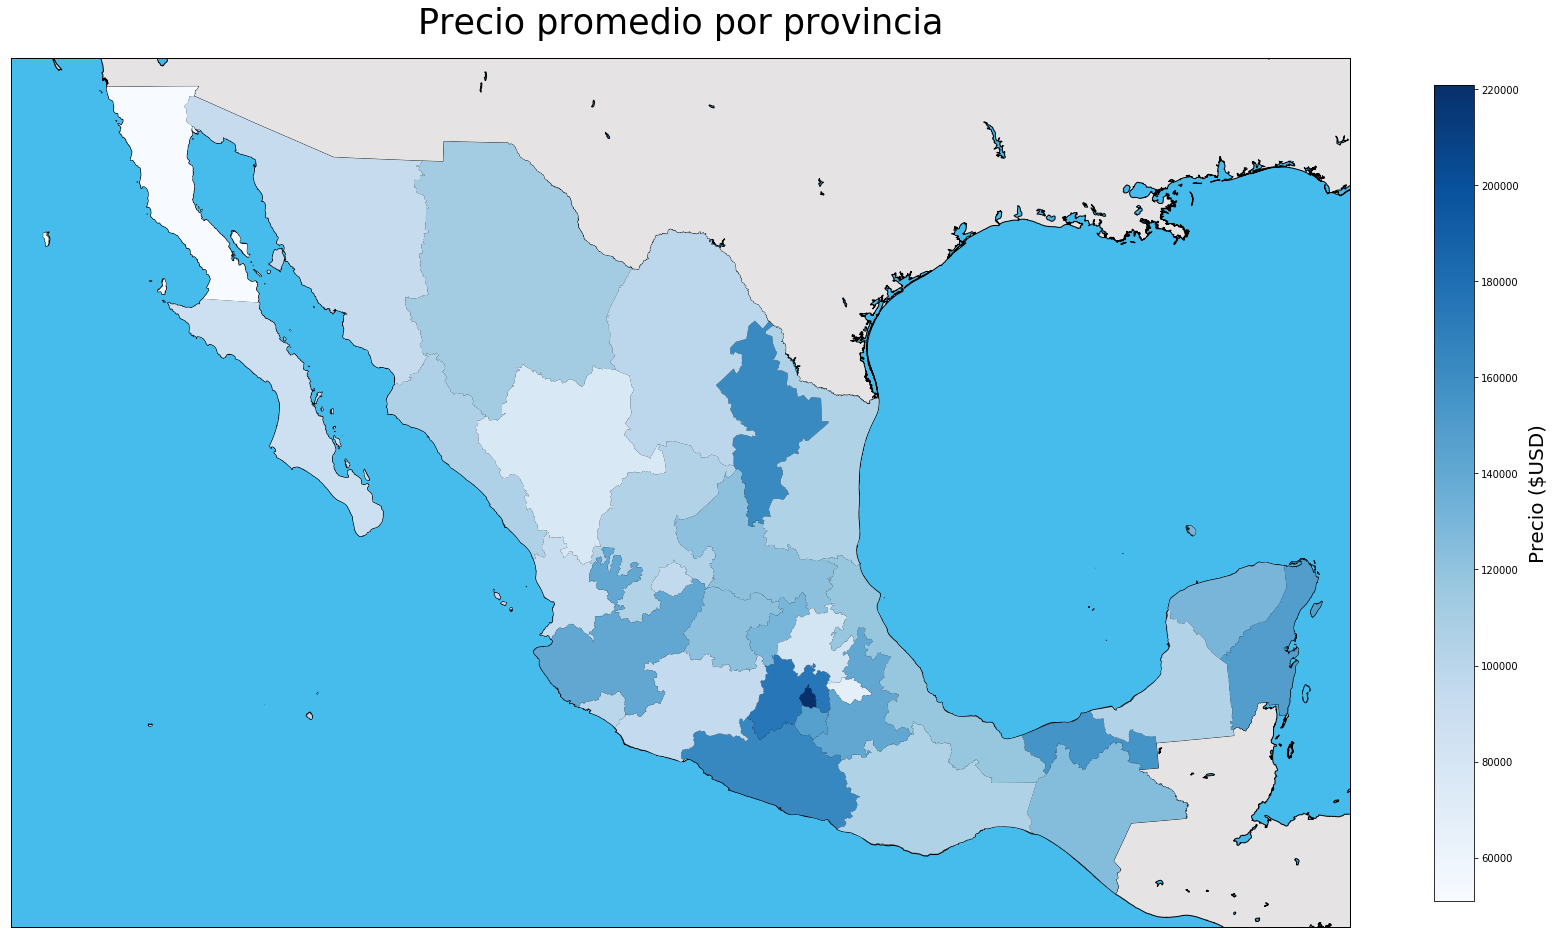

In [281]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp_provincia = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'provincia': [provincia['NOM_ENT'] for provincia in mexicoMap.shapefile_info]
    })

merge_provincia_and_map = df_map_shp_provincia.merge(df_navent_provincia, on='provincia', how='left')

#fig configuration
cmap = plt.get_cmap('Blues')   
pc = PatchCollection(merge_provincia_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_provincia_and_map['promedio'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_provincia_and_map['promedio'])

cbar = plt.colorbar(mapper, shrink=0.5)
cbar.set_label('Precio ($USD)',fontsize=20,labelpad=10)

plt.title("Precio promedio por provincia",fontsize=35, pad=25)
plt.savefig('img/promedio_por_provincia_usd.png',bbox_inches = 'tight')
plt.show()

In [282]:
fp2 = 'data/shp/Mexican_States/Mexican States.shp'
df_map_2 = gpd.read_file(fp2)[['NOM_ENT','geometry']].to_crs('+proj=robin')
df_map_2 = df_map_2.rename(columns={'NOM_ENT': 'provincia'})

In [283]:
df_map_provincia = df_map_2[['provincia']].copy()

In [284]:
#saco tildes para matchear con shapefile
df_navent['provincia'] = df_navent['provincia'].str.replace(u"á", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"é", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"í", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ó", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ú", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ñ", "")

In [285]:
idx1 = pd.Index(df_navent.provincia)
idx2 = pd.Index(df_map_provincia.provincia)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan], dtype=object)

In [286]:
df_map_2.loc[df_map_2["provincia"].str.startswith('Baja') &
            df_map_2['provincia'].str.contains('alifornia') &
            df_map_2['provincia'].str.contains(''),:]

provincia                                           geometry
5      Baja California  (POLYGON ((-10267308.38027523 3039426.90017507...
7  Baja California Sur  (POLYGON ((-10145912.8575157 2446511.567166308...

### Descubiertos:
Coahuila - Coahuila de Zaragoza (SHP)
<br>
Michoacn - Michoacn de Ocampo (SHP)
<br>
San luis Potos - San Luis Potos (SHP)
<br>
Veracruz - Veracruz de Ignacio de la Llave (SHP)
<br>
Edo. de Mxico - Mxico (SHP)
<br>
Baja California Norte - Baja California (SHP)

In [287]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['provincia'] = df_navent['provincia'].replace({"Coahuila": "Coahuila de Zaragoza"})
df_navent['provincia'] = df_navent['provincia'].replace({"Michoacn": "Michoacn de Ocampo"})
df_navent['provincia'] = df_navent['provincia'].replace({"San luis Potos": "San Luis Potos"})
df_navent['provincia'] = df_navent['provincia'].replace({"Veracruz": "Veracruz de Ignacio de la Llave"})
df_navent['provincia'] = df_navent['provincia'].replace({"Edo. de Mxico": "Mxico"})
df_navent['provincia'] = df_navent['provincia'].replace({"Baja California Norte": "Baja California"})

In [288]:
df_navent_provincia = df_navent[['antiguedad','provincia']].copy()

In [289]:
df_navent_provincia = df_navent_provincia.groupby('provincia').agg(np.mean).sort_values(by="antiguedad",ascending=False).rename(columns={'antiguedad': 'promedio'}).reset_index()

In [290]:
df_navent_provincia.head()

provincia   promedio
0  Distrito Federal  12.187500
1             Mxico  10.031250
2          Guerrero   7.605469
3         Nuevo Len   7.539062
4    Aguascalientes   7.523438

/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


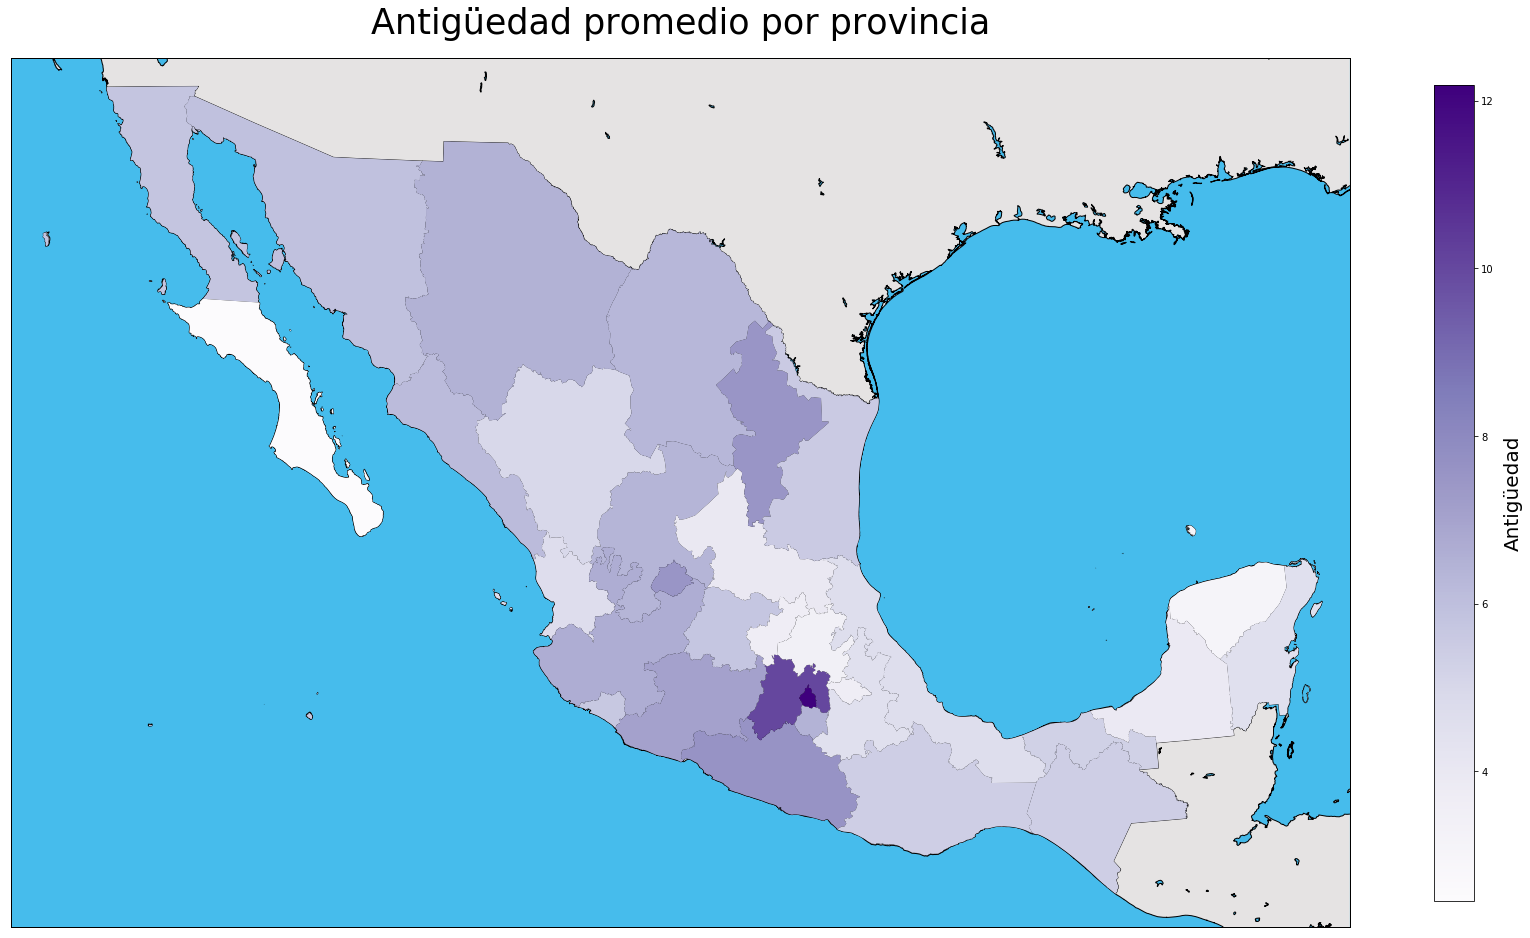

In [291]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp_provincia = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'provincia': [provincia['NOM_ENT'] for provincia in mexicoMap.shapefile_info]
    })

merge_provincia_and_map = df_map_shp_provincia.merge(df_navent_provincia, on='provincia', how='left')


#fig configuration
cmap = plt.get_cmap('Purples')   
pc = PatchCollection(merge_provincia_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_provincia_and_map['promedio'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_provincia_and_map['promedio'])

cbar = plt.colorbar(mapper, shrink=0.5)
cbar.set_label('Antigüedad',fontsize=20,labelpad=10)

plt.title("Antigüedad promedio por provincia",fontsize=35, pad=25)
plt.savefig('img/promedio_por_provincia_antiguedad.png',bbox_inches = 'tight')
plt.show()

In [292]:
fp2 = 'data/shp/Mexican_States/Mexican States.shp'
df_map_2 = gpd.read_file(fp2)[['NOM_ENT','geometry']].to_crs('+proj=robin')
df_map_2 = df_map_2.rename(columns={'NOM_ENT': 'provincia'})

In [293]:
df_map_provincia = df_map_2[['provincia']].copy()

In [294]:
#saco tildes para matchear con shapefile
df_navent['provincia'] = df_navent['provincia'].str.replace(u"á", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"é", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"í", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ó", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ú", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ñ", "")

In [295]:
idx1 = pd.Index(df_navent.provincia)
idx2 = pd.Index(df_map_provincia.provincia)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan], dtype=object)

In [296]:
df_map_2.loc[df_map_2["provincia"].str.startswith('Baja') &
            df_map_2['provincia'].str.contains('alifornia') &
            df_map_2['provincia'].str.contains(''),:]

provincia                                           geometry
5      Baja California  (POLYGON ((-10267308.38027523 3039426.90017507...
7  Baja California Sur  (POLYGON ((-10145912.8575157 2446511.567166308...

### Descubiertos:
Coahuila - Coahuila de Zaragoza (SHP)
<br>
Michoacn - Michoacn de Ocampo (SHP)
<br>
San luis Potos - San Luis Potos (SHP)
<br>
Veracruz - Veracruz de Ignacio de la Llave (SHP)
<br>
Edo. de Mxico - Mxico (SHP)
<br>
Baja California Norte - Baja California (SHP)

In [297]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['provincia'] = df_navent['provincia'].replace({"Coahuila": "Coahuila de Zaragoza"})
df_navent['provincia'] = df_navent['provincia'].replace({"Michoacn": "Michoacn de Ocampo"})
df_navent['provincia'] = df_navent['provincia'].replace({"San luis Potos": "San Luis Potos"})
df_navent['provincia'] = df_navent['provincia'].replace({"Veracruz": "Veracruz de Ignacio de la Llave"})
df_navent['provincia'] = df_navent['provincia'].replace({"Edo. de Mxico": "Mxico"})
df_navent['provincia'] = df_navent['provincia'].replace({"Baja California Norte": "Baja California"})

In [298]:
df_navent_provincia = df_navent[['metrostotales','provincia']].copy()

In [299]:
df_navent_provincia = df_navent_provincia.groupby('provincia').agg(np.mean).sort_values(by="metrostotales",ascending=False).rename(columns={'metrostotales': 'promedio'}).reset_index()

In [300]:
df_navent_provincia.head()

provincia  promedio
0                Yucatn   261.000
1             Chihuahua   213.750
2               Morelos   209.625
3  Coahuila de Zaragoza   208.875
4              Campeche   204.625

/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


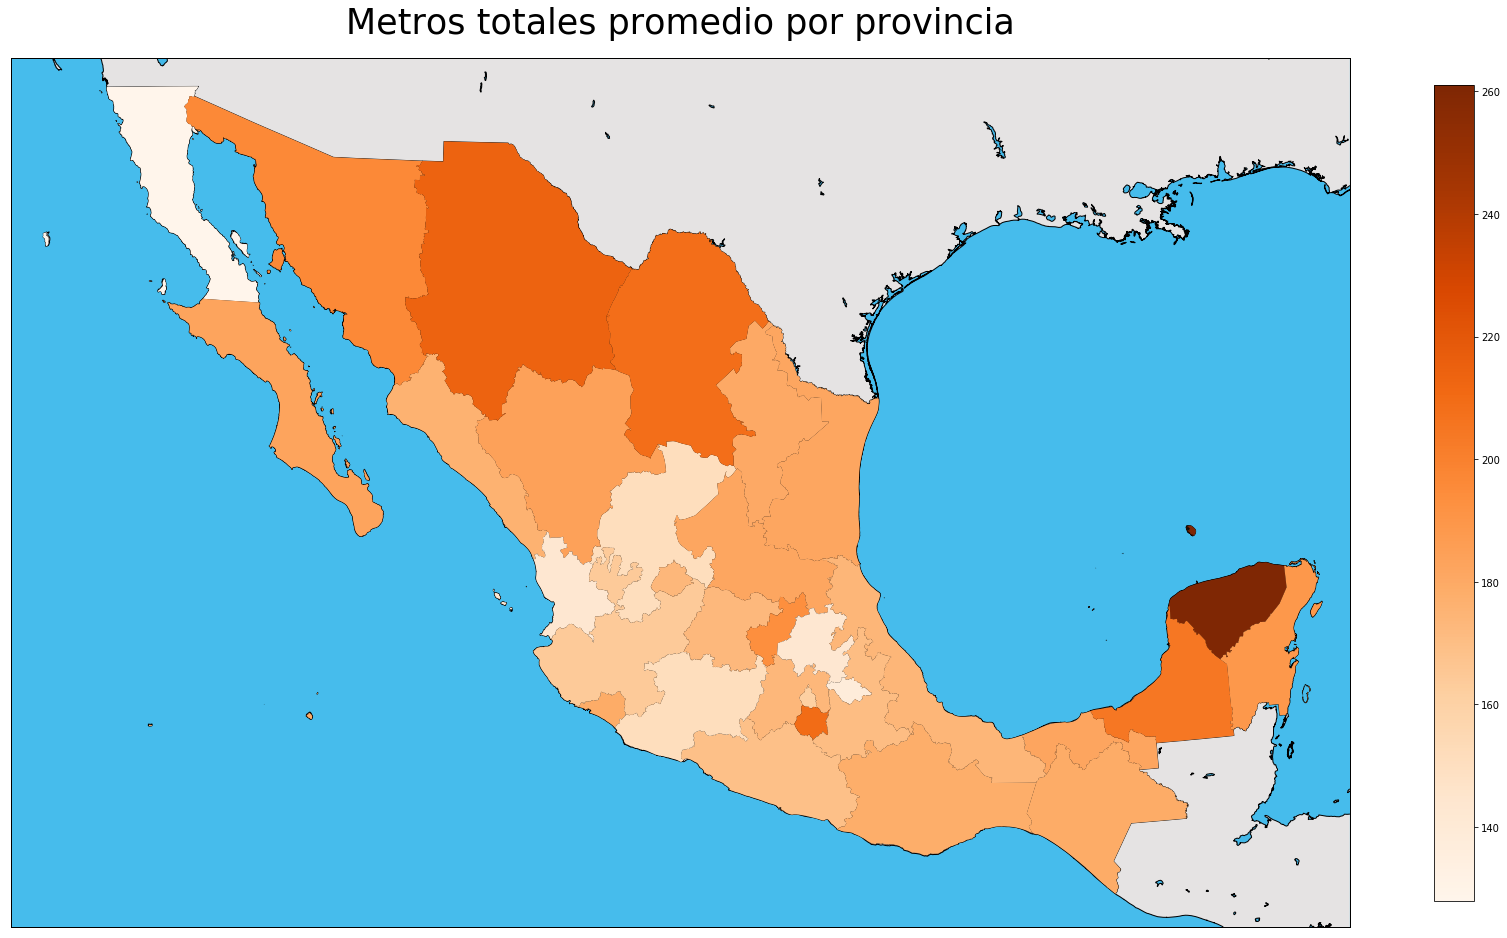

In [301]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp_provincia = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'provincia': [provincia['NOM_ENT'] for provincia in mexicoMap.shapefile_info]
    })

merge_provincia_and_map = df_map_shp_provincia.merge(df_navent_provincia, on='provincia', how='left')


#fig configuration
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(merge_provincia_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_provincia_and_map['promedio'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_provincia_and_map['promedio'])

plt.colorbar(mapper, shrink=0.5)
plt.title("Metros totales promedio por provincia",fontsize=35, pad=25)
plt.savefig('img/promedio_por_provincia_metrostotales.png',bbox_inches = 'tight')
plt.show()

## Precio ($MXN) VS algo

## Precio vs cantidad de habitaciones

Hasta 5 habitaciones

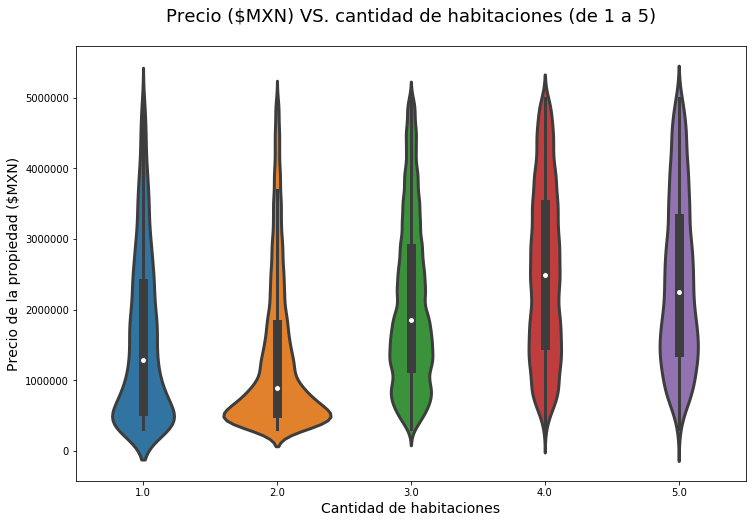

In [116]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 0)&(df_navent['habitaciones'] <= 5) \
               &(df_navent['precio'] < 5000000),['habitaciones', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de habitaciones (de 1 a 5)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_hab_1_a_5.png')
plt.show()

De 5 a 10 habitaciones

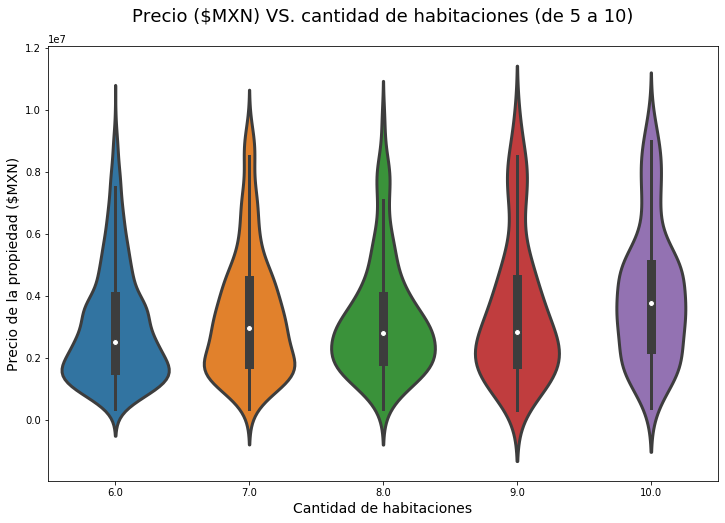

In [117]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 5)&(df_navent['habitaciones'] <= 10) \
               &(df_navent['precio'] < 10000000),['habitaciones', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de habitaciones (de 5 a 10)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_hab_5_a_10.png')
plt.show()

## Precio vs cantidad de garages

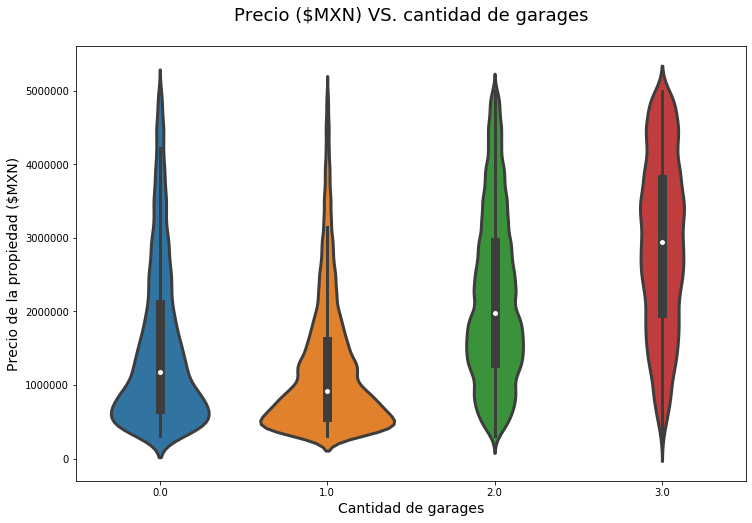

In [118]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio'] < 5000000),['garages', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='garages', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de garages",fontsize=18, pad=25)
plt.xlabel("Cantidad de garages",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_gar.png')
plt.show()

## Precio vs cantidad de baños

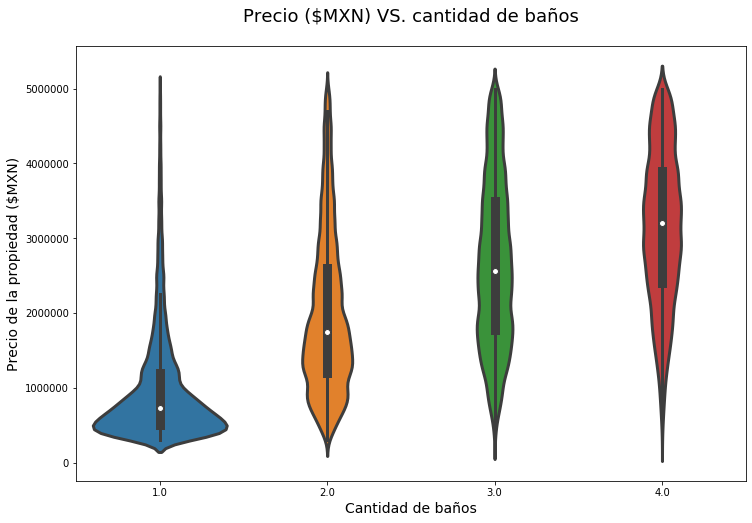

In [119]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio'] < 5000000),['banos', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='banos', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de baños",fontsize=18, pad=25)
plt.xlabel("Cantidad de baños",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_ban.png')
plt.show()

## Precio ($USD) VS algo

## Precio vs cantidad de habitaciones

Hasta 5 habitaciones

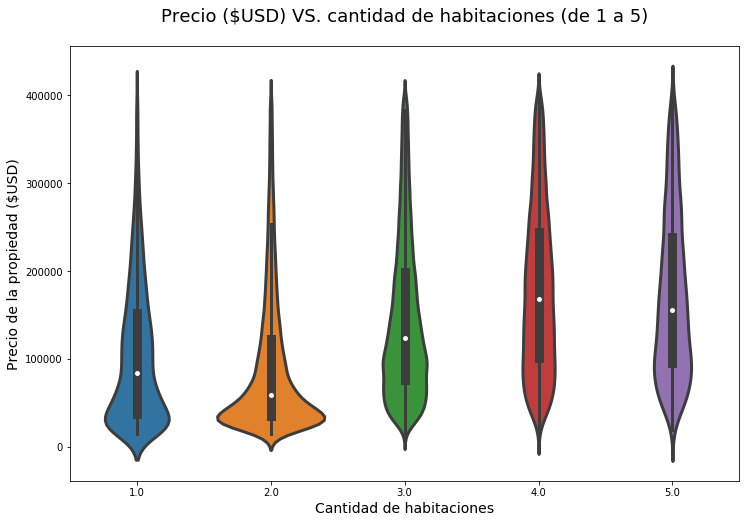

In [120]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 0)&(df_navent['habitaciones'] <= 5) \
               &(df_navent['precio_usd'] < 400000),['habitaciones', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de habitaciones (de 1 a 5)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_hab_1_a_5.png')
plt.show()

De 5 a 10 habitaciones

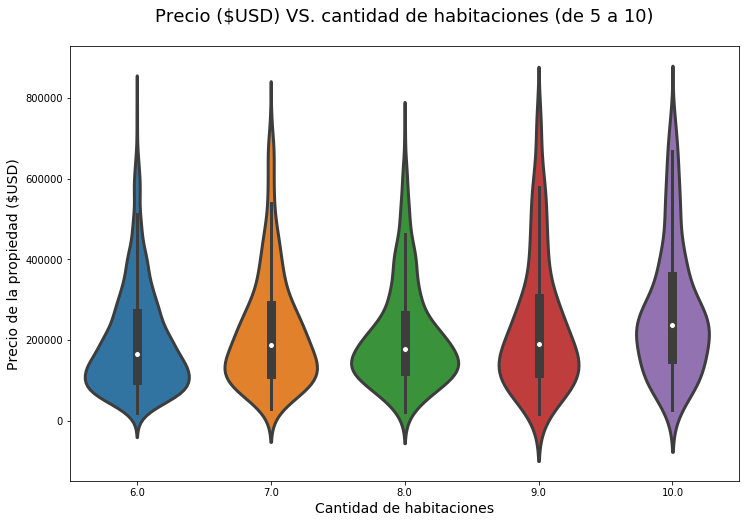

In [121]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 5)&(df_navent['habitaciones'] <= 10) \
               &(df_navent['precio_usd'] < 800000),['habitaciones', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de habitaciones (de 5 a 10)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_hab_5_a_10.png')
plt.show()

## Precio vs cantidad de garages

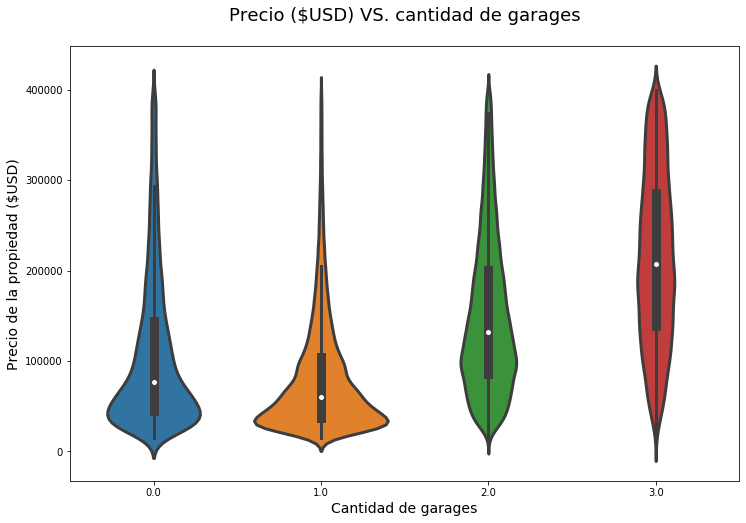

In [122]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio_usd'] < 400000),['garages', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='garages', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de garages",fontsize=18, pad=25)
plt.xlabel("Cantidad de garages",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_gar.png')
plt.show()

## Precio vs cantidad de baños

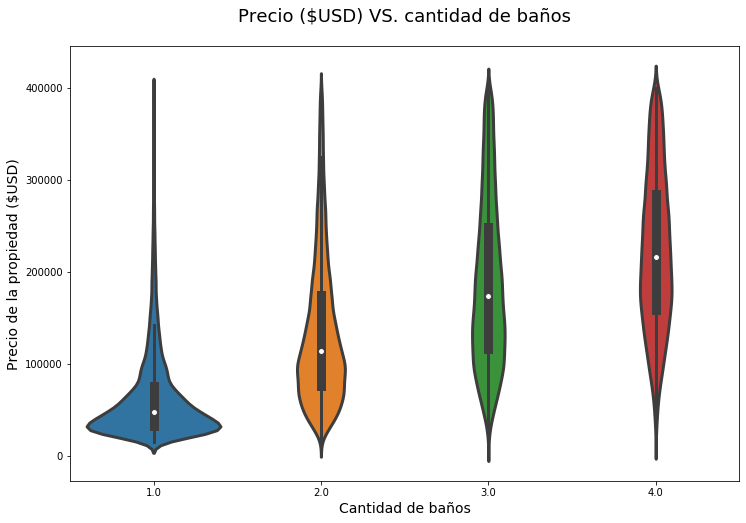

In [123]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio_usd'] < 400000),['banos', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='banos', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de baños",fontsize=18, pad=25)
plt.xlabel("Cantidad de baños",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_ban.png')
plt.show()

## Tipo de propiedad - datos cruzados - analisis de NaNs al cruzar los datos

Aquí se va viendo que categorias se deberian dejar para usarlo en el analisis ya que se pierden muchos datos al intentar cruzarlos y los graficos no soportan NaNs. 
<br>
Aquellos con porcentaje mayor a 70% se dejan

In [117]:
df = df_navent.copy()

In [118]:
df = df[['tipodepropiedad','banos','habitaciones','garages']]

In [119]:
df['tipodepropiedad'].cat.categories

Index(['Apartamento', 'Bodega comercial', 'Casa', 'Casa en condominio',
       'Casa uso de suelo', 'Departamento Compartido', 'Duplex', 'Edificio',
       'Huerta', 'Inmuebles productivos urbanos', 'Local Comercial',
       'Local en centro comercial', 'Lote', 'Nave industrial',
       'Oficina comercial', 'Otros', 'Quinta Vacacional', 'Rancho', 'Terreno',
       'Terreno comercial', 'Terreno industrial', 'Villa', 'Hospedaje',
       'Garage'],
      dtype='object')

In [120]:
df_old = df.tipodepropiedad.value_counts()

In [121]:
df = df.dropna()

In [122]:
df_new = df.tipodepropiedad.value_counts()

In [123]:
print ("Casa:", df_new['Casa'] / df_old['Casa'])
print ("Apartamento:", df_new['Apartamento'] / df_old['Apartamento'])
print ("Bodega comercial:", df_new['Bodega comercial'] / df_old['Bodega comercial'])
print ("Casa en condominio:", df_new['Casa en condominio'] / df_old['Casa en condominio'])
print ("Casa uso de suelo:", df_new['Casa uso de suelo'] / df_old['Casa uso de suelo'])
print ("Departamento Compartido:", df_new['Departamento Compartido'] / df_old['Departamento Compartido'])
print ("Duplex:", df_new['Duplex'] / df_old['Duplex'])
print ("Edificio:", df_new['Edificio'] / df_old['Edificio'])
print ("Huerta:", df_new['Huerta'] / df_old['Huerta'])
print ("Inmuebles productivos urbanos:", df_new['Inmuebles productivos urbanos'] / df_old['Inmuebles productivos urbanos'])
print ("Local Comercial:", df_new['Local Comercial'] / df_old['Local Comercial'])
print ("Local en centro comercial:", df_new['Local en centro comercial'] / df_old['Local en centro comercial'])
print ("Nave industrial:", df_new['Nave industrial'] / df_old['Nave industrial'])
print ("Oficina comercial:", df_new['Oficina comercial'] / df_old['Oficina comercial'])
print ("Otros:", df_new['Otros'] / df_old['Otros'])
print ("Quinta Vacacional:", df_new['Quinta Vacacional'] / df_old['Quinta Vacacional'])
print ("Rancho:", df_new['Rancho'] / df_old['Rancho'])
print ("Terreno:", df_new['Terreno'] / df_old['Terreno'])
print ("Terreno comercial:", df_new['Terreno comercial'] / df_old['Terreno comercial'])
print ("Terreno industrial:", df_new['Terreno industrial'] / df_old['Terreno industrial'])
print ("Villa:", df_new['Villa'] / df_old['Villa'])
print ("Hospedaje:", df_new['Hospedaje'] / df_old['Hospedaje'])
print ("Garage:", df_new['Garage'] / df_old['Garage'])

Casa: 0.7825737208662334
Apartamento: 0.9111456026229051
Bodega comercial: 0.05334281650071124
Casa en condominio: 0.8019899466238275
Casa uso de suelo: 0.4081920903954802
Departamento Compartido: 0.9148936170212766
Duplex: 0.9620991253644315
Edificio: 0.07736389684813753
Huerta: 0.15
Inmuebles productivos urbanos: 0.175
Local Comercial: 0.06382978723404255
Local en centro comercial: 0.04242424242424243
Nave industrial: 0.06578947368421052
Oficina comercial: 0.10109132682366456
Otros: 0.3283582089552239
Quinta Vacacional: 0.31139240506329113
Rancho: 0.3
Terreno: 0.02262443438914027
Terreno comercial: 0.030165912518853696
Terreno industrial: 0.06451612903225806
Villa: 0.5058823529411764
Hospedaje: 0.0
Garage: 0.0


Se pueden dejar los siguientes:
<br>
<br>
Casa
<br>
Apartamento
<br>
Casa en condominio
<br>
Departamento compartido
<br>
Duplex

## Coordenadas paralelas 

In [204]:
df = df_navent.copy()

In [205]:
df = df[['tipodepropiedad','banos','habitaciones','garages']]

In [206]:
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()

In [207]:
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)

In [208]:
df['tipodepropiedad'].cat.categories

Index(['Casa', 'Apartamento', 'Casa en condominio', 'Departamento Compartido',
       'Duplex'],
      dtype='object')

In [209]:
df = df.dropna()

In [210]:
df.head()

tipodepropiedad  banos  habitaciones  garages
0         Apartamento    2.0           2.0      1.0
1  Casa en condominio    2.0           3.0      2.0
2                Casa    2.0           3.0      2.0
3                Casa    1.0           2.0      1.0
4         Apartamento    1.0           2.0      1.0

In [211]:
df.tipodepropiedad.value_counts()

Casa                       110904
Apartamento                 52246
Casa en condominio          15476
Duplex                        330
Departamento Compartido       129
Name: tipodepropiedad, dtype: int64

In [212]:
df['code'] = df.tipodepropiedad.cat.codes

In [213]:
df.head()

tipodepropiedad  banos  habitaciones  garages  code
0         Apartamento    2.0           2.0      1.0     1
1  Casa en condominio    2.0           3.0      2.0     2
2                Casa    2.0           3.0      2.0     0
3                Casa    1.0           2.0      1.0     0
4         Apartamento    1.0           2.0      1.0     1

In [214]:
df.code.value_counts()

0    110904
1     52246
2     15476
4       330
3       129
Name: code, dtype: int64

In [215]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='FCozza', api_key='fpQ9YB5Ekgy3YU8BZU2V')

data = [go.Parcoords(
        line = dict(color = df['code'],
                   colorscale = 'Jet'),
        dimensions = list([
            dict(range = [0,max(df['banos'])],
                label = 'Baños', values = df['banos']),
            dict(range = [0,max(df['habitaciones'])],
                label = 'Habitaciones', values = df['habitaciones']),
            dict(range = [0,max(df['garages'])],
                label = 'Garages', values = df['garages'])]))]
layout = go.Layout(title='Comparación de atributos del interior entre diferentes tipos de propiedad')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Radar chart

In [207]:
df = df_navent.copy()

In [208]:
df = df[['tipodepropiedad','banos','habitaciones','garages']]

In [209]:
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()

In [210]:
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)

In [211]:
df['tipodepropiedad'].cat.categories

Index(['Casa', 'Apartamento', 'Casa en condominio', 'Departamento Compartido',
       'Duplex'],
      dtype='object')

In [212]:
df = df.dropna()

In [213]:
df.head()

tipodepropiedad  banos  habitaciones  garages
0         Apartamento    2.0           2.0      1.0
1  Casa en condominio    2.0           3.0      2.0
2                Casa    2.0           3.0      2.0
3                Casa    1.0           2.0      1.0
4         Apartamento    1.0           2.0      1.0

In [214]:
df.tipodepropiedad.value_counts()

Casa                       110904
Apartamento                 52246
Casa en condominio          15476
Duplex                        330
Departamento Compartido       129
Name: tipodepropiedad, dtype: int64

In [215]:
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

In [216]:
df.head(10)

tipodepropiedad     banos  habitaciones   garages
0                     Casa  2.175781      3.013672  1.722656
1              Apartamento  1.794922      2.375000  1.422852
2       Casa en condominio  2.300781      2.910156  1.913086
3  Departamento Compartido  1.751953      2.472656  1.379883
4                   Duplex  1.333008      2.490234  1.187500

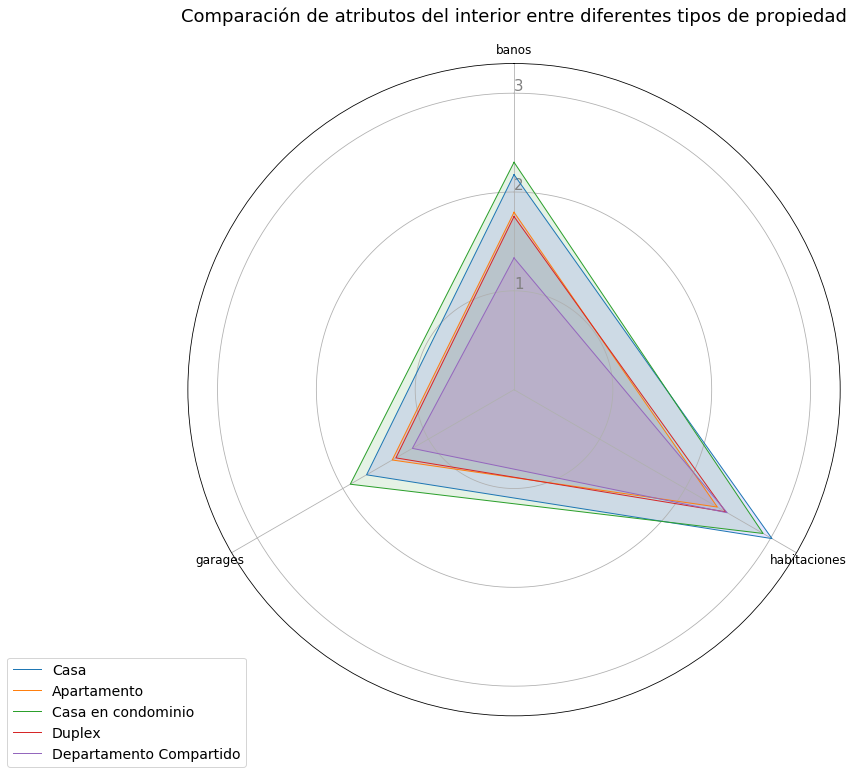

In [288]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre diferentes tipos de propiedad',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'c', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'm', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop.png',bbox_inches = 'tight')
plt.show()

In [287]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

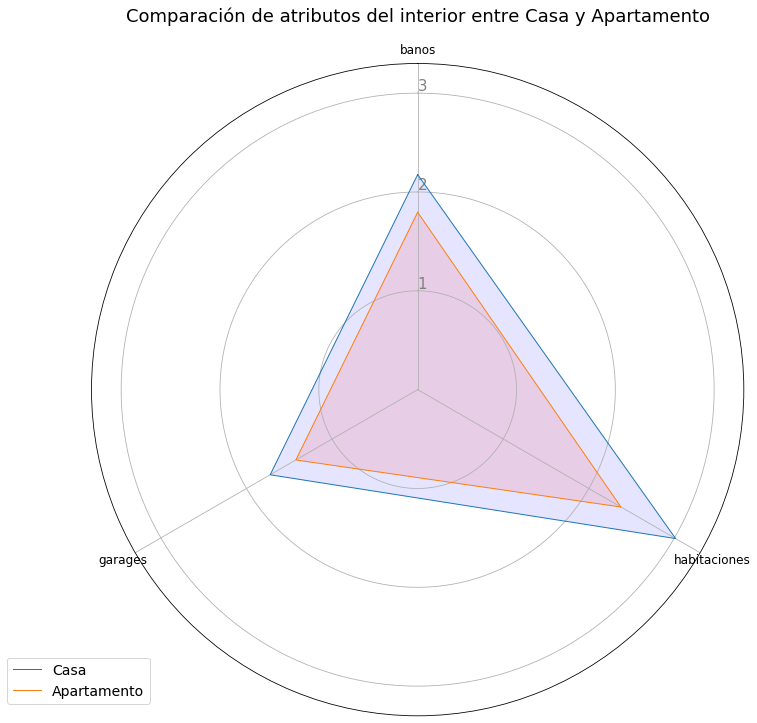

In [326]:
from math import pi

 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa y Apartamento',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_casa_apart.png',bbox_inches = 'tight')
plt.show()

In [294]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

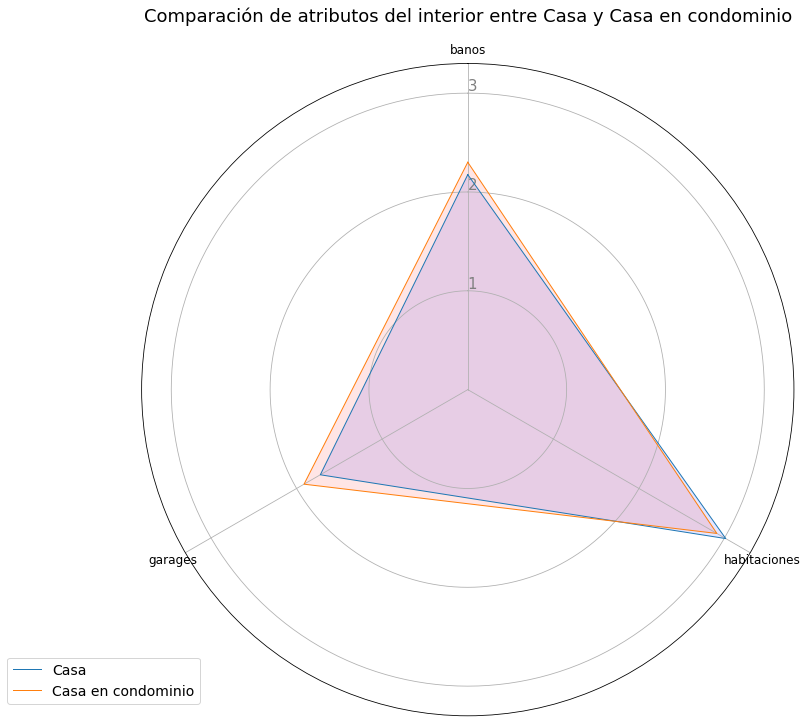

In [295]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa y Casa en condominio',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_casa_condo.png',bbox_inches = 'tight')
plt.show()

In [296]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

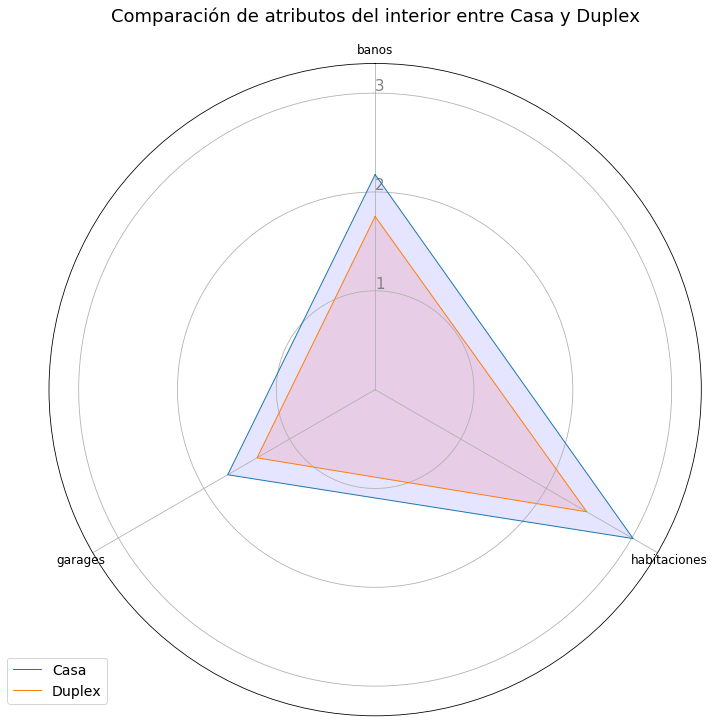

In [297]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_casa_duplex.png',bbox_inches = 'tight')
plt.show()

In [298]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

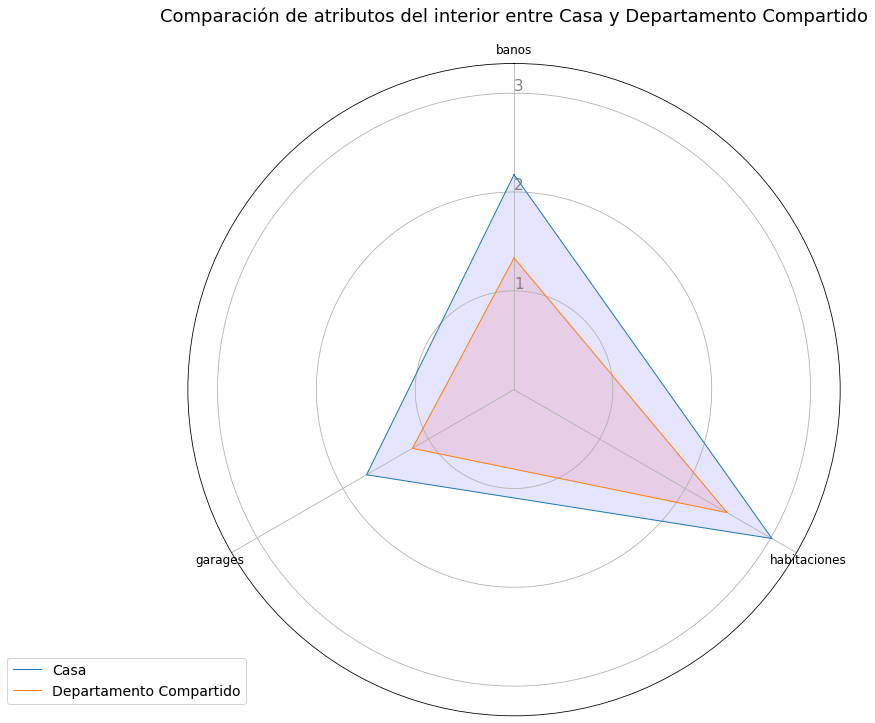

In [299]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_casa_dpto.png',bbox_inches = 'tight')
plt.show()

In [299]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

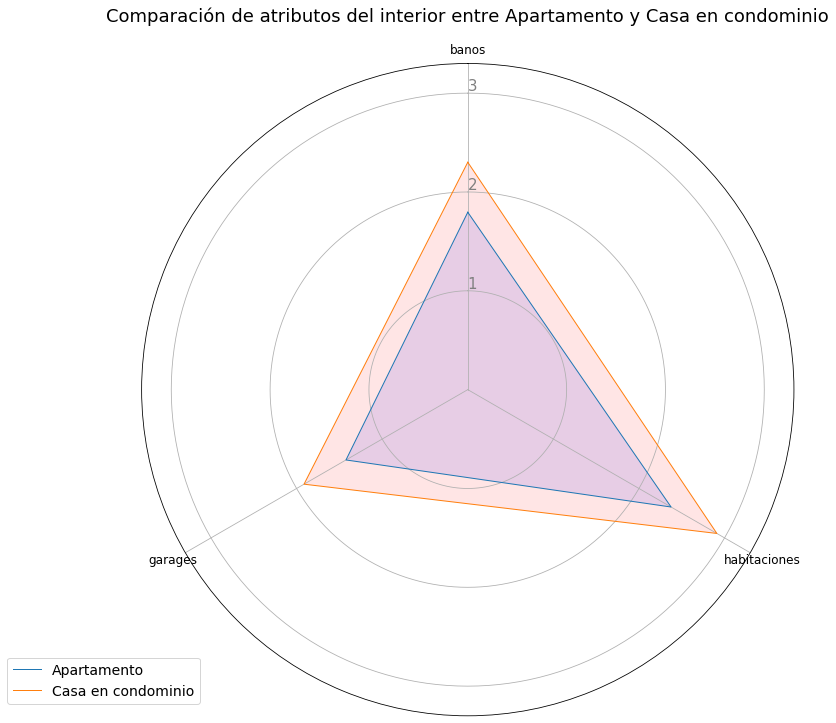

In [300]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Apartamento y Casa en condominio',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_apart_condo.png',bbox_inches = 'tight')
plt.show()

In [301]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

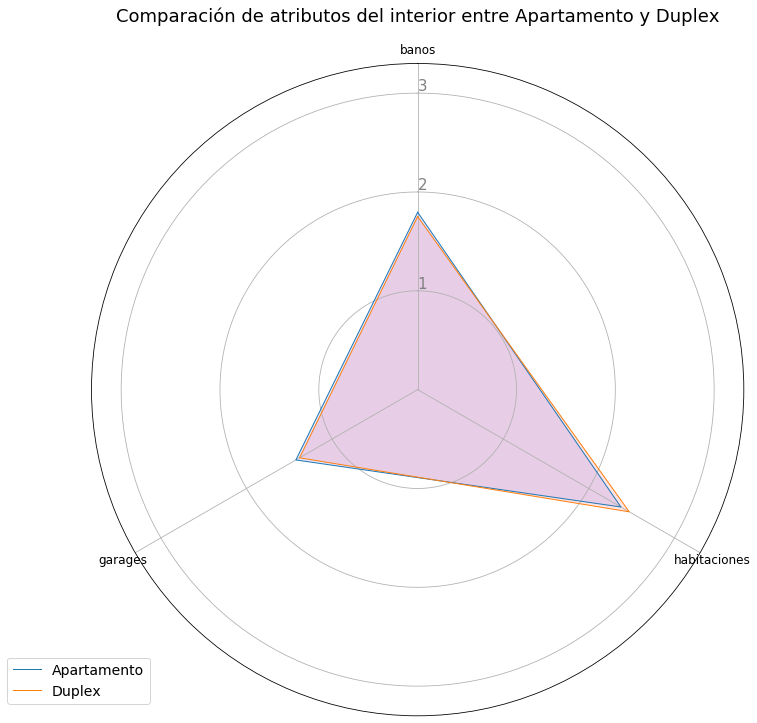

In [302]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Apartamento y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_apart_duplex.png',bbox_inches = 'tight')
plt.show()

In [303]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

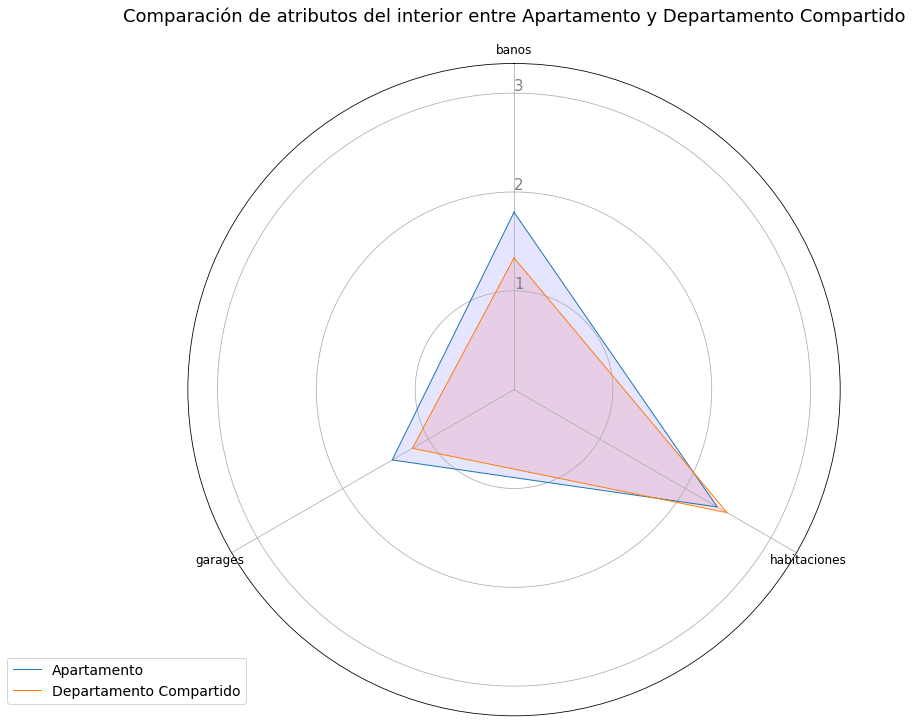

In [304]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Apartamento y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'b', alpha=0.1)


# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_apart_dpto.png',bbox_inches = 'tight')
plt.show()

In [305]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

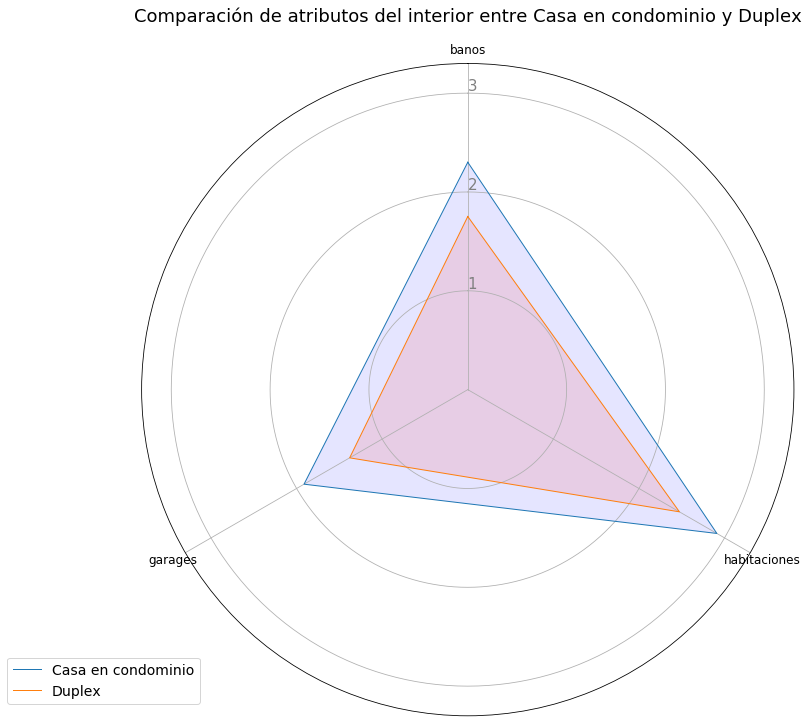

In [306]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa en condominio y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_condo_duplex.png',bbox_inches = 'tight')
plt.show()

In [307]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

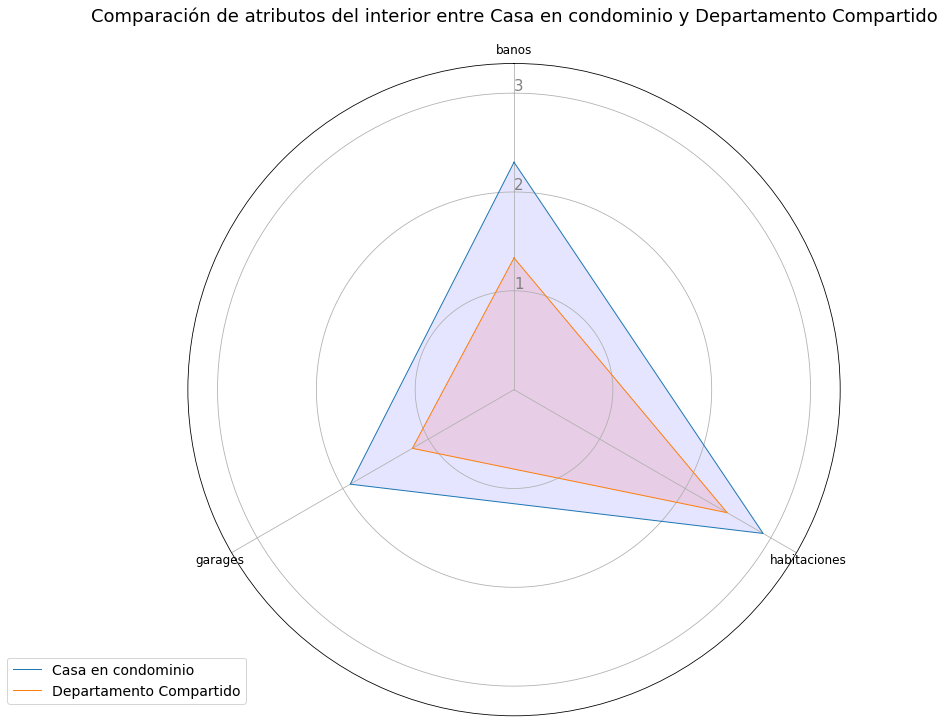

In [308]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa en condominio y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable


# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_condo_dpto.png',bbox_inches = 'tight')
plt.show()

In [309]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

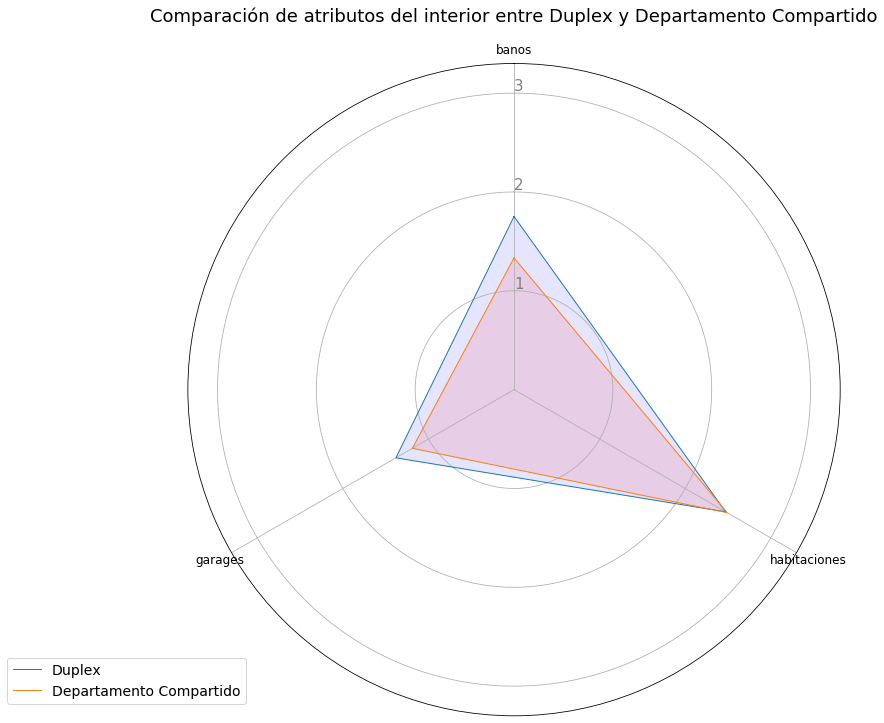

In [310]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Duplex y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_duplex_dpto.png',bbox_inches = 'tight')
plt.show()

## Tipo de propiedad - datos cruzados - analisis de NaNs al cruzar los datos

Aquí se va viendo que categorias se deberian dejar para usarlo en el analisis ya que se pierden muchos datos al intentar cruzarlos y los graficos no soportan NaNs. 
<br>
Aquellos con porcentaje mayor a 60% se dejan

In [7]:
df = df_navent.copy()

In [8]:
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]

In [9]:
df['tipodepropiedad'].cat.categories

Index(['Apartamento', 'Bodega comercial', 'Casa', 'Casa en condominio',
       'Casa uso de suelo', 'Departamento Compartido', 'Duplex', 'Edificio',
       'Huerta', 'Inmuebles productivos urbanos', 'Local Comercial',
       'Local en centro comercial', 'Lote', 'Nave industrial',
       'Oficina comercial', 'Otros', 'Quinta Vacacional', 'Rancho', 'Terreno',
       'Terreno comercial', 'Terreno industrial', 'Villa', 'Hospedaje',
       'Garage'],
      dtype='object')

In [10]:
df_old = df.tipodepropiedad.value_counts()

In [11]:
df = df.dropna()

In [12]:
df_new = df.tipodepropiedad.value_counts()

In [13]:
print ("Casa:", df_new['Casa'] / df_old['Casa'])
print ("Apartamento:", df_new['Apartamento'] / df_old['Apartamento'])
print ("Bodega comercial:", df_new['Bodega comercial'] / df_old['Bodega comercial'])
print ("Casa en condominio:", df_new['Casa en condominio'] / df_old['Casa en condominio'])
print ("Casa uso de suelo:", df_new['Casa uso de suelo'] / df_old['Casa uso de suelo'])
print ("Departamento Compartido:", df_new['Departamento Compartido'] / df_old['Departamento Compartido'])
print ("Duplex:", df_new['Duplex'] / df_old['Duplex'])
print ("Edificio:", df_new['Edificio'] / df_old['Edificio'])
print ("Huerta:", df_new['Huerta'] / df_old['Huerta'])
print ("Inmuebles productivos urbanos:", df_new['Inmuebles productivos urbanos'] / df_old['Inmuebles productivos urbanos'])
print ("Local Comercial:", df_new['Local Comercial'] / df_old['Local Comercial'])
print ("Local en centro comercial:", df_new['Local en centro comercial'] / df_old['Local en centro comercial'])
print ("Nave industrial:", df_new['Nave industrial'] / df_old['Nave industrial'])
print ("Oficina comercial:", df_new['Oficina comercial'] / df_old['Oficina comercial'])
print ("Otros:", df_new['Otros'] / df_old['Otros'])
print ("Quinta Vacacional:", df_new['Quinta Vacacional'] / df_old['Quinta Vacacional'])
print ("Rancho:", df_new['Rancho'] / df_old['Rancho'])
print ("Terreno:", df_new['Terreno'] / df_old['Terreno'])
print ("Terreno comercial:", df_new['Terreno comercial'] / df_old['Terreno comercial'])
print ("Terreno industrial:", df_new['Terreno industrial'] / df_old['Terreno industrial'])
print ("Villa:", df_new['Villa'] / df_old['Villa'])
print ("Hospedaje:", df_new['Hospedaje'] / df_old['Hospedaje'])
print ("Garage:", df_new['Garage'] / df_old['Garage'])

Casa: 0.701461363139214
Apartamento: 0.429308871488115
Bodega comercial: 0.5021337126600285
Casa en condominio: 0.7216147587707934
Casa uso de suelo: 0.615819209039548
Departamento Compartido: 0.6737588652482269
Duplex: 0.8950437317784257
Edificio: 0.36031518624641834
Huerta: 0.05
Inmuebles productivos urbanos: 0.57
Local Comercial: 0.47528641571194763
Local en centro comercial: 0.593939393939394
Nave industrial: 0.40789473684210525
Oficina comercial: 0.39919586444572086
Otros: 0.43283582089552236
Quinta Vacacional: 0.08354430379746836
Rancho: 0.029411764705882353
Terreno: 0.017697335344394168
Terreno comercial: 0.11689291101055807
Terreno industrial: 0.0967741935483871
Villa: 0.35294117647058826
Hospedaje: 0.0
Garage: 0.0


Se pueden dejar los siguientes:
<br>
<br>
Casa
<br>
Casa uso de suelo
<br>
Casa en condominio
<br>
Departamento compartido
<br>
Duplex

## Coordenadas paralelas 

In [216]:
df = df_navent.copy()

In [217]:
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]

In [218]:
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()

In [219]:
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)

In [220]:
df['tipodepropiedad'].cat.categories

Index(['Casa', 'Casa uso de suelo', 'Casa en condominio',
       'Departamento Compartido', 'Duplex'],
      dtype='object')

In [221]:
df = df.dropna()

In [222]:
df.head()

tipodepropiedad  metrostotales  metroscubiertos  antiguedad
1   Casa en condominio          180.0            268.0        10.0
2                 Casa          166.0            144.0         5.0
3                 Casa           67.0             63.0         1.0
7                 Casa          293.0            293.0         2.0
12                Casa          141.0            170.0         0.0

In [223]:
df.tipodepropiedad.value_counts()

Casa                       99409
Casa en condominio         13925
Casa uso de suelo            436
Duplex                       307
Departamento Compartido       95
Name: tipodepropiedad, dtype: int64

In [224]:
df['code'] = df.tipodepropiedad.cat.codes

In [225]:
df.head()

tipodepropiedad  metrostotales  metroscubiertos  antiguedad  code
1   Casa en condominio          180.0            268.0        10.0     2
2                 Casa          166.0            144.0         5.0     0
3                 Casa           67.0             63.0         1.0     0
7                 Casa          293.0            293.0         2.0     0
12                Casa          141.0            170.0         0.0     0

In [226]:
df.code.value_counts()

0    99409
2    13925
1      436
4      307
3       95
Name: code, dtype: int64

In [237]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='FCozza', api_key='fpQ9YB5Ekgy3YU8BZU2V')

data = [go.Parcoords(
        line = dict(color = df['code'],
                   colorscale = 'Jet'),
        dimensions = list([
            dict(range = [0,max(df['metrostotales'])],
                label = 'Metros totales', values = df['metrostotales']),
            dict(range = [0,max(df['metroscubiertos'])],
                label = 'Metros cubiertos', values = df['metroscubiertos']),
            dict(range = [0,max(df['antiguedad'])],
                label = 'Antigüedad', values = df['antiguedad'])])\
)]
layout = go.Layout(title='Comparación de atributos generales entre diferentes tipos de propiedad')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

## Radar chart

In [252]:
df = df_navent.copy()

In [253]:
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]

In [254]:
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()

In [255]:
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)

In [256]:
df['tipodepropiedad'].cat.categories

Index(['Casa', 'Casa uso de suelo', 'Casa en condominio',
       'Departamento Compartido', 'Duplex'],
      dtype='object')

In [257]:
df = df.dropna()

In [258]:
df.head()

tipodepropiedad  metrostotales  metroscubiertos  antiguedad
1   Casa en condominio          180.0            268.0        10.0
2                 Casa          166.0            144.0         5.0
3                 Casa           67.0             63.0         1.0
7                 Casa          293.0            293.0         2.0
12                Casa          141.0            170.0         0.0

In [259]:
df.tipodepropiedad.value_counts()

Casa                       99409
Casa en condominio         13925
Casa uso de suelo            436
Duplex                       307
Departamento Compartido       95
Name: tipodepropiedad, dtype: int64

In [260]:
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

In [261]:
df.head(10)

tipodepropiedad  metrostotales  metroscubiertos  antiguedad
0                     Casa       176.5000          181.875    8.078125
1        Casa uso de suelo       217.2500          248.000   18.343750
2       Casa en condominio       163.8750          179.250    6.195312
3  Departamento Compartido       126.8750          120.750    6.589844
4                   Duplex       100.6875          100.000    9.937500

In [262]:
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [263]:
df.head()

tipodepropiedad  metrostotales  metroscubiertos  antiguedad
0                     Casa       0.650391         0.553223    0.155029
1        Casa uso de suelo       1.000000         1.000000    1.000000
2       Casa en condominio       0.541992         0.535645    0.000000
3  Departamento Compartido       0.224609         0.140259    0.032471
4                   Duplex       0.000000         0.000000    0.308105

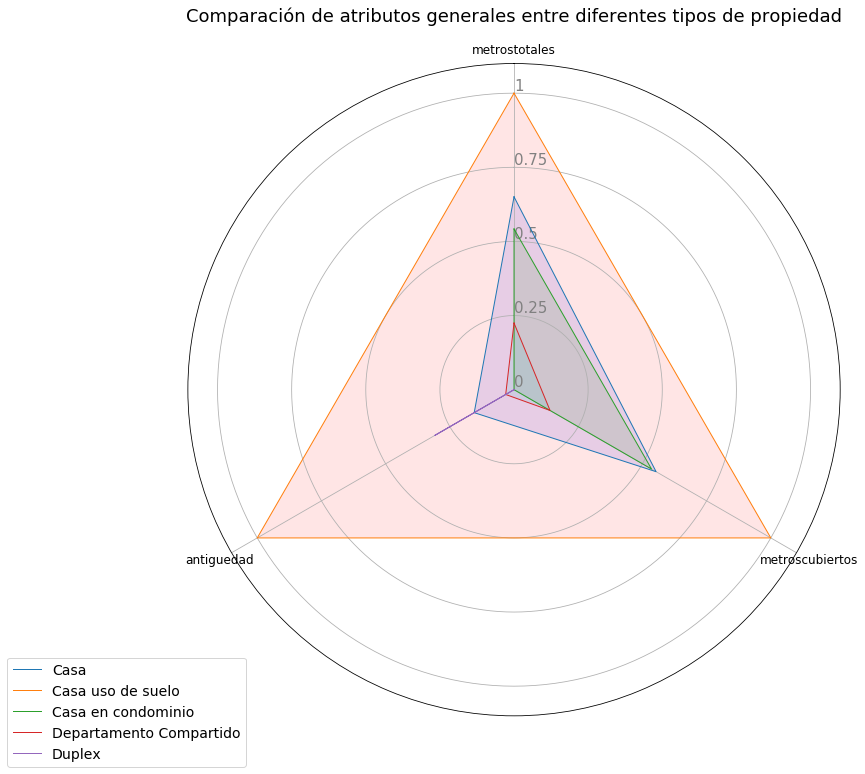

In [282]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre diferentes tipos de propiedad',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa uso de suelo")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'c', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'm', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop.png',bbox_inches = 'tight')
plt.show()

In [281]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

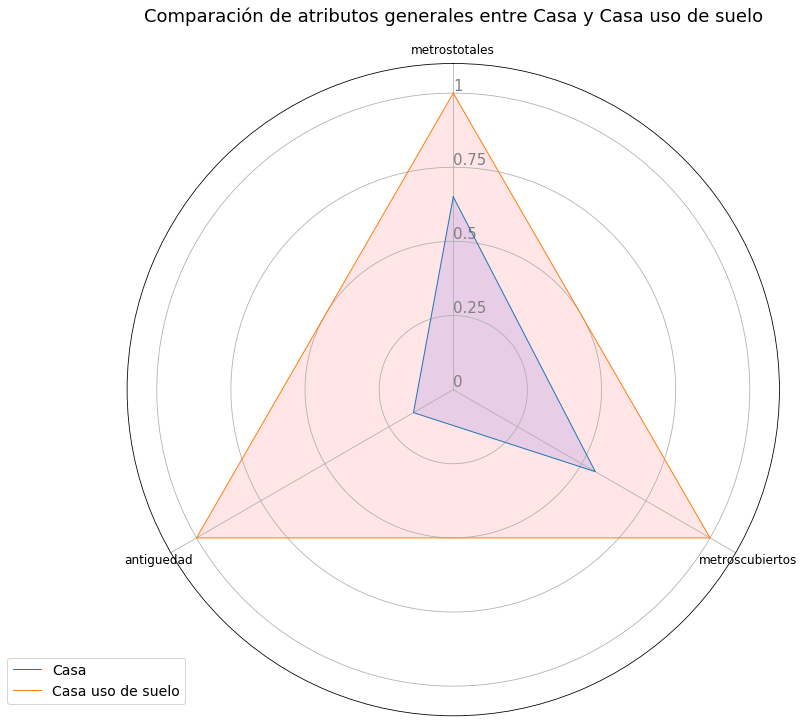

In [266]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Casa y Casa uso de suelo',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa uso de suelo")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_casa_suelo.png',bbox_inches = 'tight')
plt.show()

In [285]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

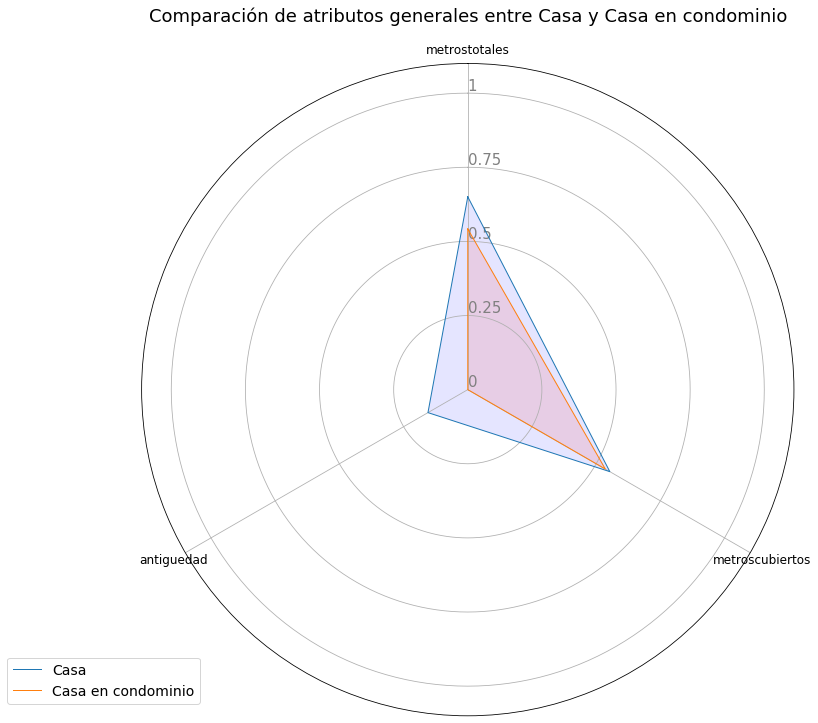

In [286]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Casa y Casa en condominio',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_casa_condo.png',bbox_inches = 'tight')
plt.show()

In [269]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

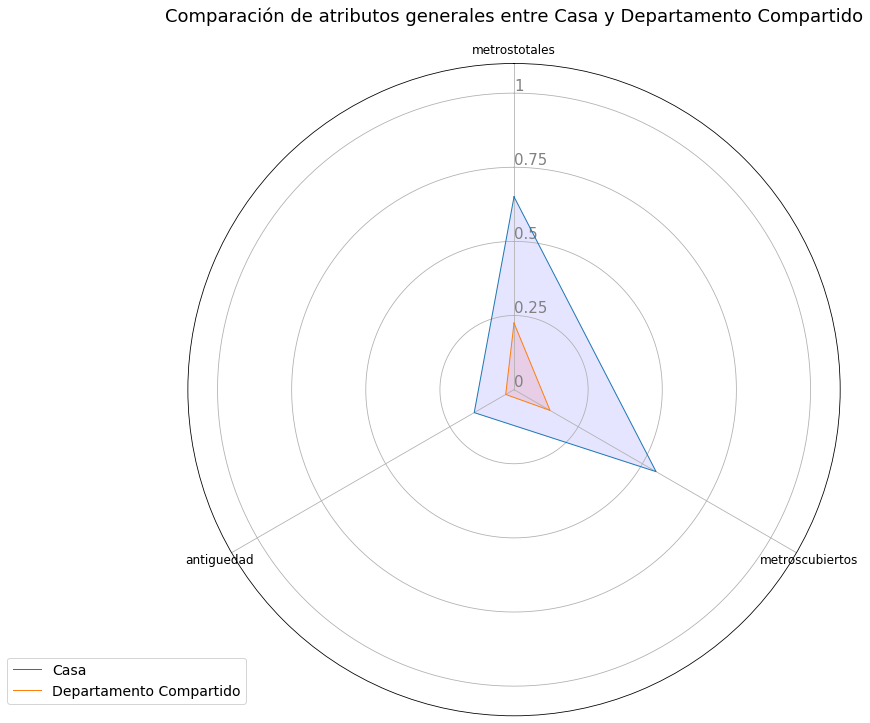

In [270]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Casa y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_casa_dpto.png',bbox_inches = 'tight')
plt.show()

In [271]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

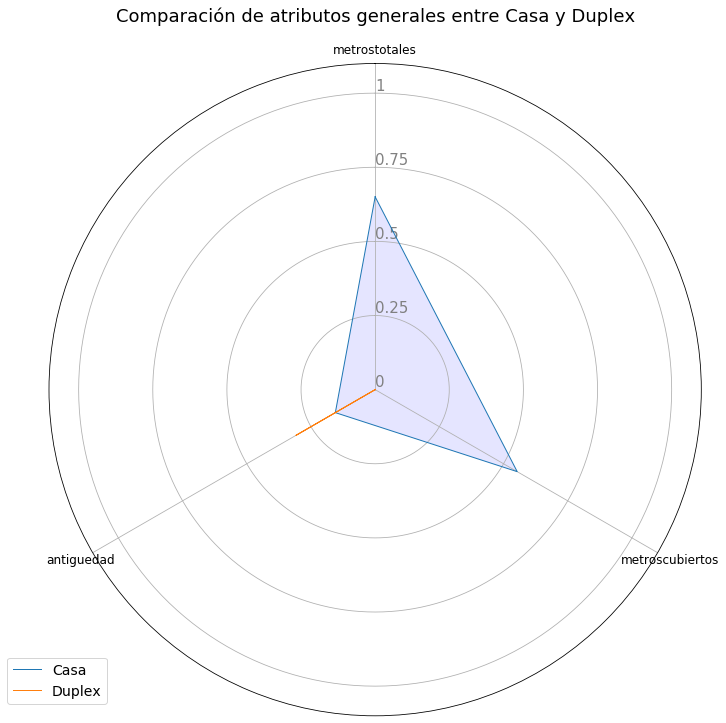

In [272]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Casa y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_casa_duplex.png',bbox_inches = 'tight')
plt.show()

In [276]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

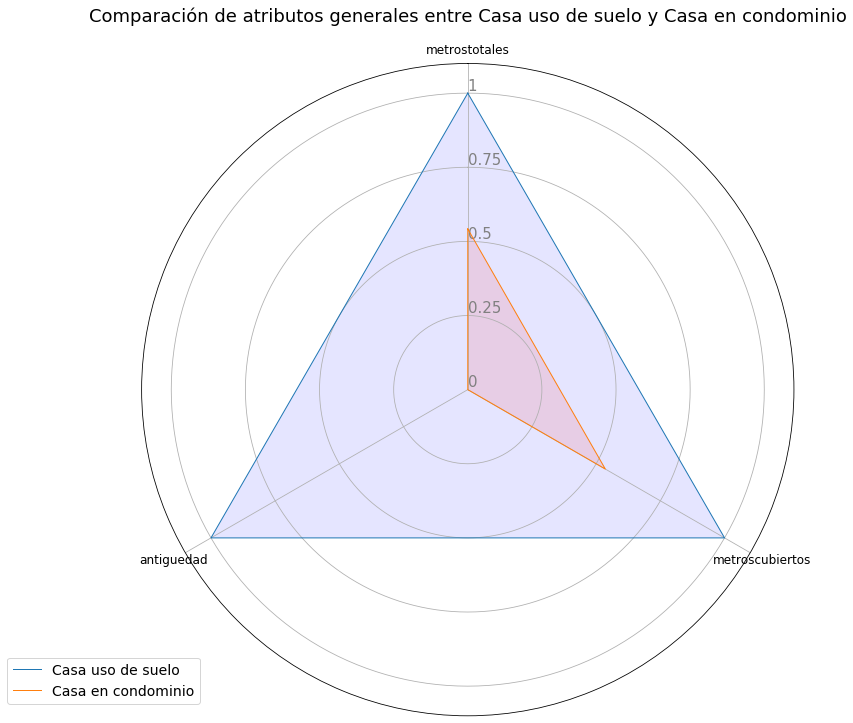

In [277]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Casa uso de suelo y Casa en condominio',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa uso de suelo")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_suelo_condo.png',bbox_inches = 'tight')
plt.show()

In [289]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

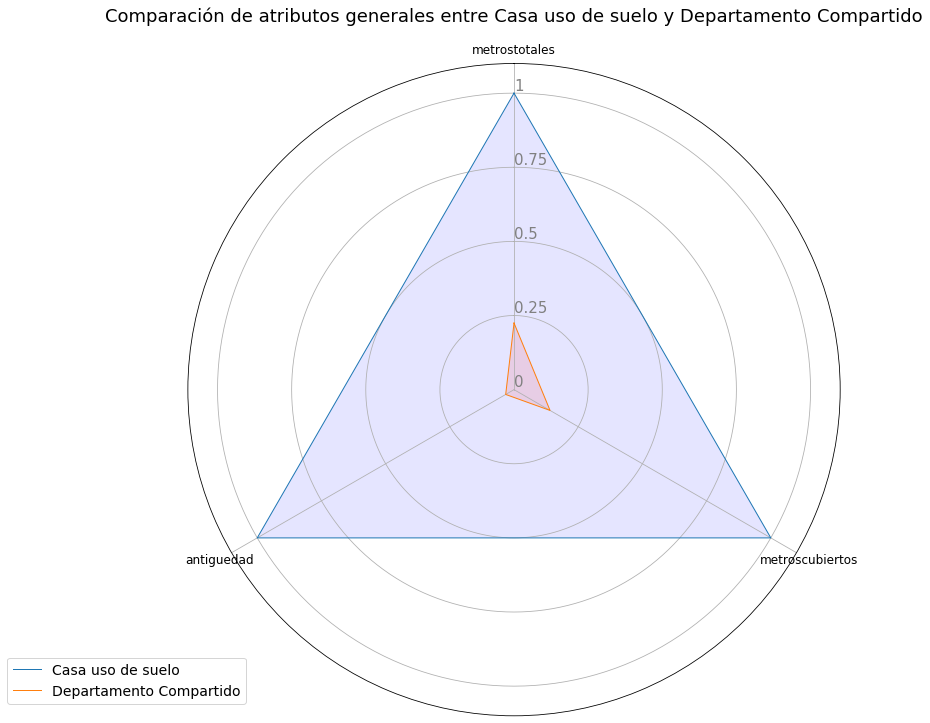

In [279]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Casa uso de suelo y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa uso de suelo")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_suelo_dpto.png',bbox_inches = 'tight')
plt.show()

In [290]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

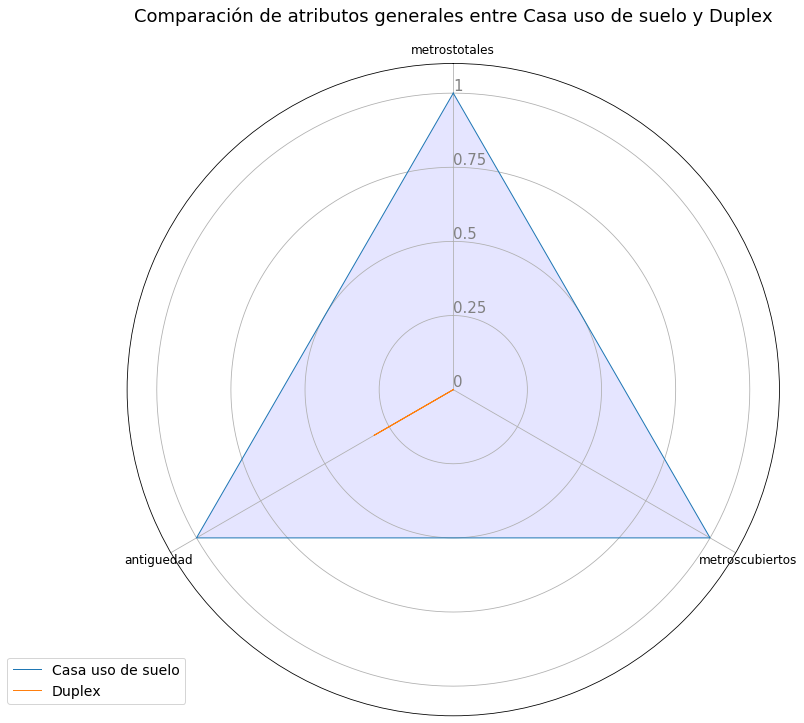

In [291]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Casa uso de suelo y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa uso de suelo")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_suelos_duplex.png',bbox_inches = 'tight')
plt.show()

In [292]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

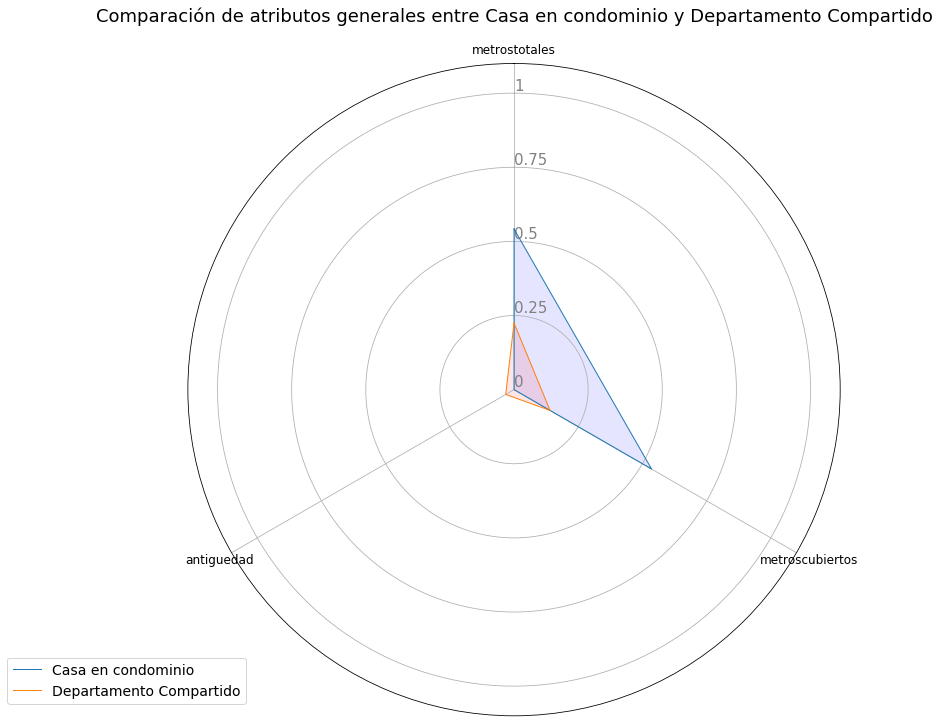

In [293]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Casa en condominio y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_condo_dpto.png',bbox_inches = 'tight')
plt.show()

In [294]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

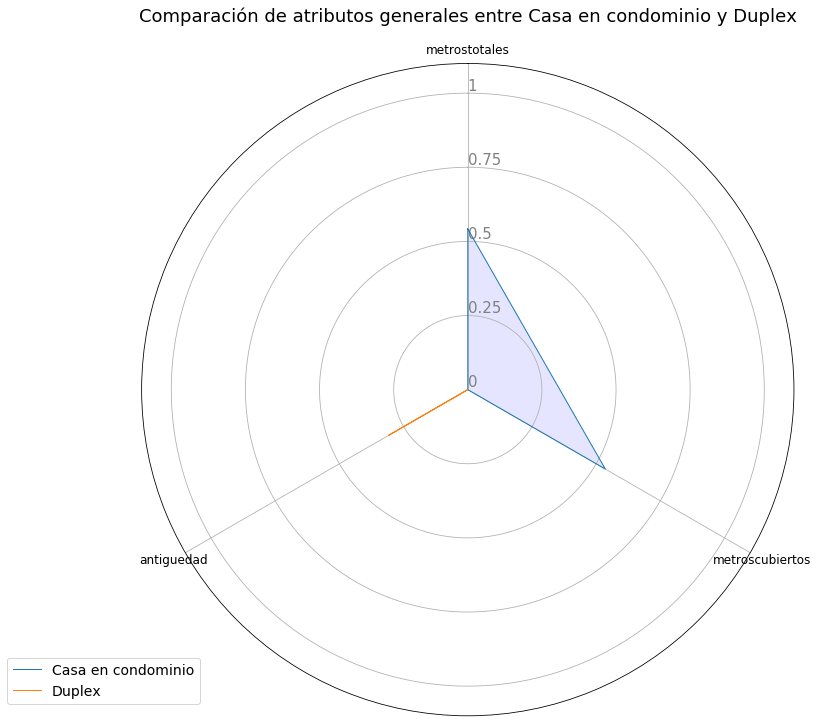

In [296]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Casa en condominio y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_condo_duplex.png',bbox_inches = 'tight')
plt.show()

In [297]:
df = df_navent.copy()
df = df[['tipodepropiedad','metrostotales','metroscubiertos','antiguedad']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Casa uso de suelo") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Casa uso de suelo','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()
cols_to_norm = ['metrostotales', 'metroscubiertos','antiguedad']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

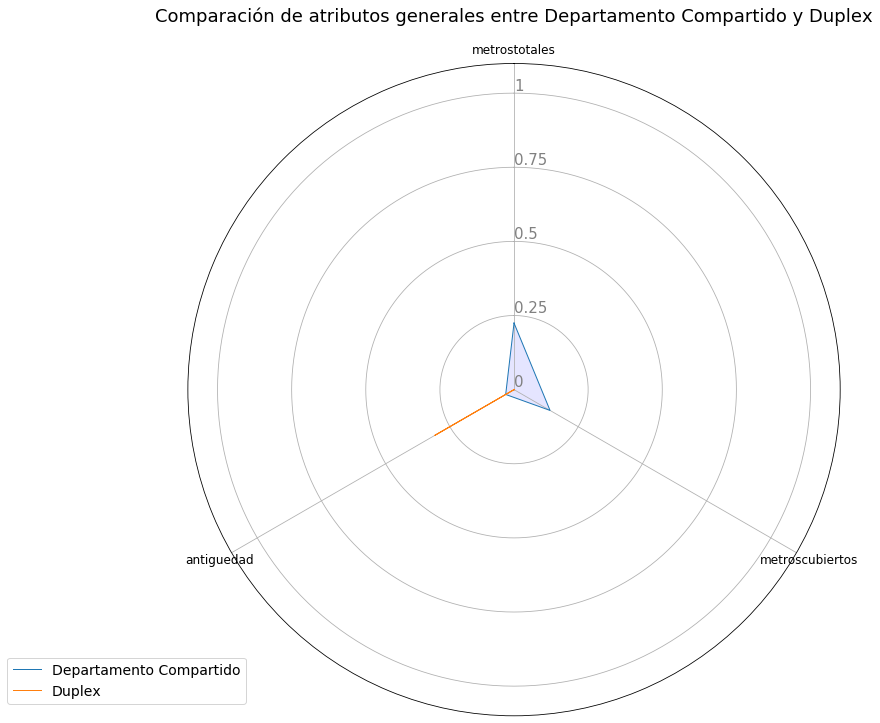

In [298]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos generales entre Departamento Compartido y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=15)
plt.ylim(0,1.1)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_gen_tipos_prop_dpto_duplex.png',bbox_inches = 'tight')
plt.show()

## Boxplot precio por provincia

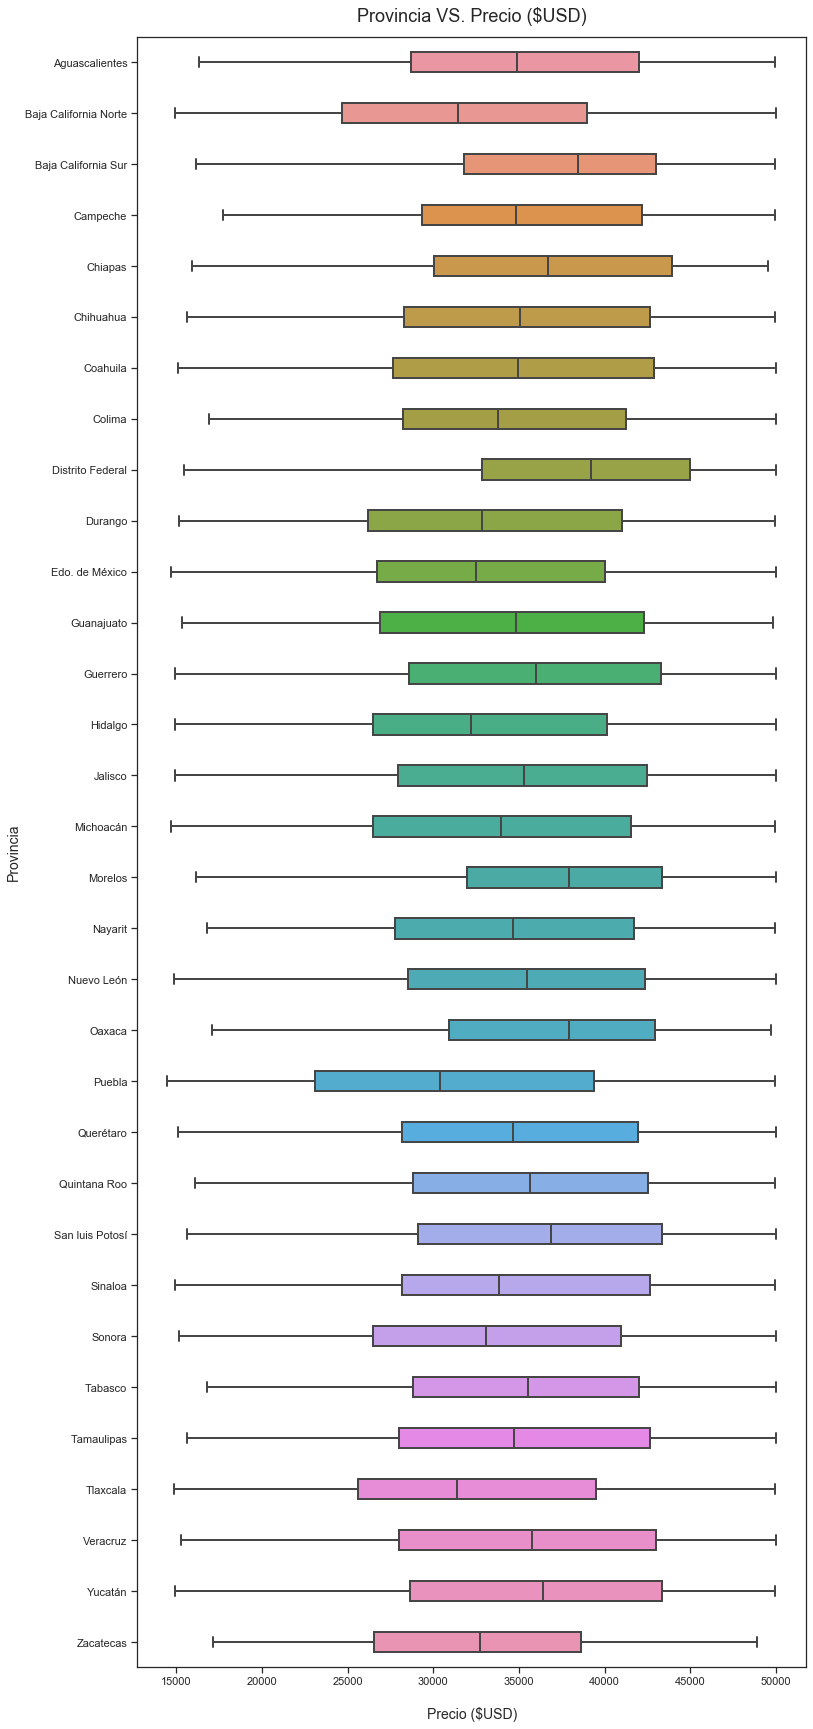

In [156]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[df_navent['precio_usd'] < 50000,['provincia', 'precio_usd']]

fig = plt.figure(figsize=(12,30))

sns.boxplot(x='precio_usd', y='provincia', data=aux,width=0.4, linewidth=2,orient="h")

plt.title(u"Provincia VS. Precio ($USD)",fontsize=18, pad=15)
plt.xlabel("Precio ($USD)",fontsize=14,labelpad=20) 
plt.ylabel("Provincia",fontsize=14)
plt.savefig('img/boxplot_prov_precio_usd.png',bbox_inches = 'tight')
plt.show()

In [68]:
df_navent['price_usd_per_m2'] = df_navent['precio_usd'] / df_navent['metrostotales']

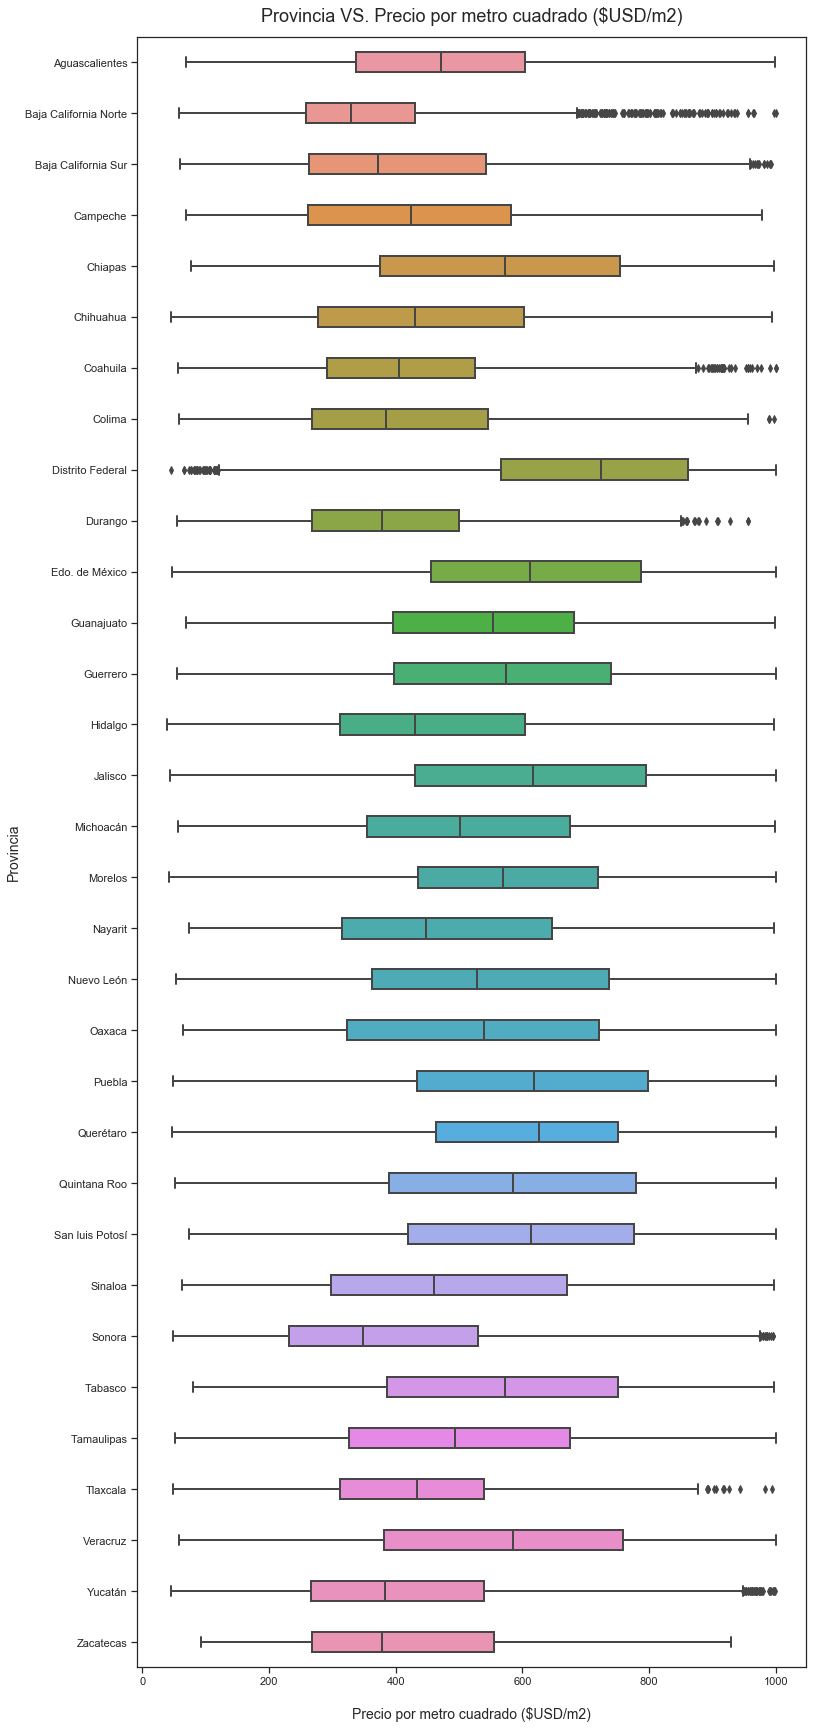

In [83]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[df_navent['price_usd_per_m2'] < 1000,['provincia', 'price_usd_per_m2']]

fig = plt.figure(figsize=(12,30))

sns.boxplot(x='price_usd_per_m2', y='provincia', data=aux,width=0.4, linewidth=2,orient="h")

plt.title(u"Provincia VS. Precio por metro cuadrado ($USD/m2)",fontsize=18, pad=15)
plt.xlabel("Precio por metro cuadrado ($USD/m2)",fontsize=14,labelpad=20) 
plt.ylabel("Provincia",fontsize=14)
plt.savefig('img/boxplot_prov_price_usd_per_m2.png',bbox_inches = 'tight')
plt.show()

## Mas sobre las fechas

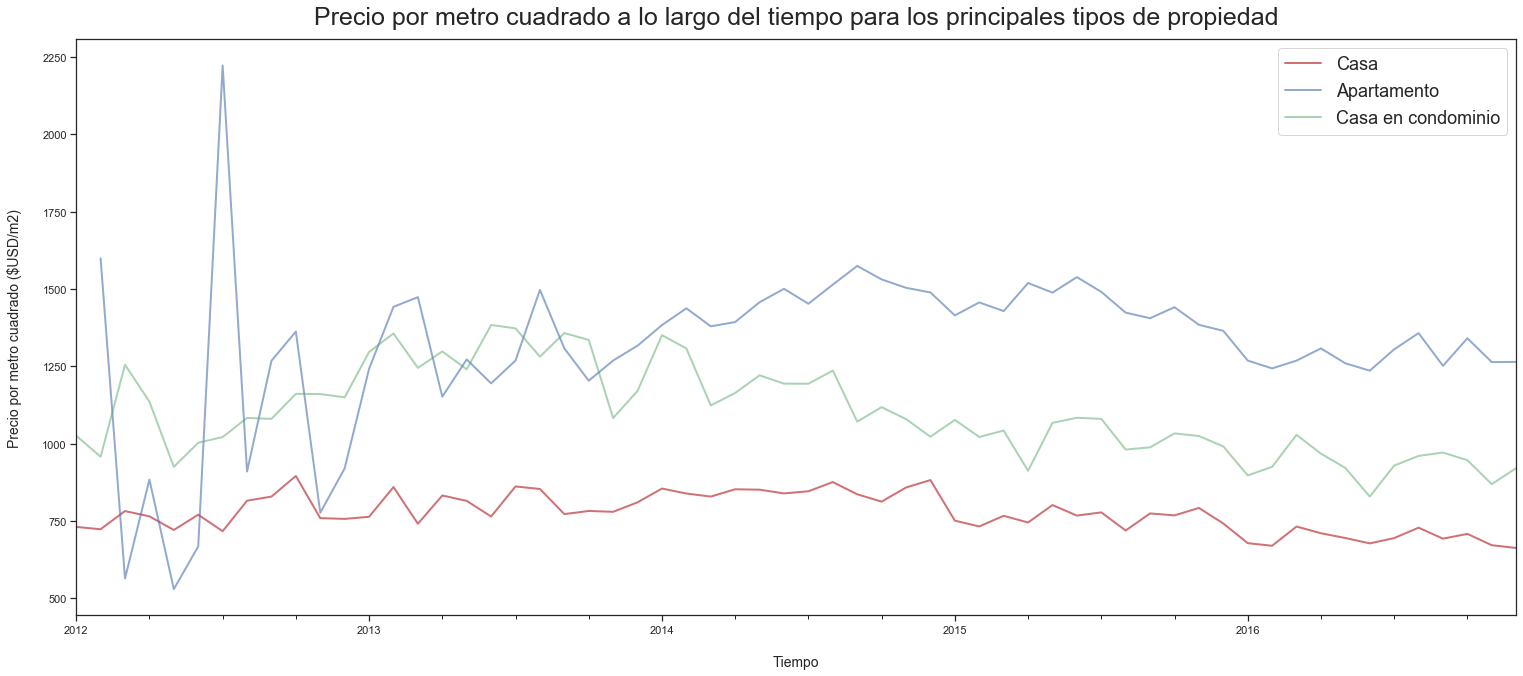

In [154]:
aux = df_navent.loc[:,['tipodepropiedad', 'fecha','price_usd_per_m2']]
aux['mesanio'] = aux['fecha'].dt.to_period('M')

fig = plt.figure(figsize=(20,8))
left = 0
bottom = 0
width = 1
height = 1
ax = fig.add_axes([left,bottom,width,height]);

aux.loc[aux['tipodepropiedad'] == "Casa"].groupby('mesanio').mean().loc[:,'price_usd_per_m2'].\
plot.line(linewidth=2, c='r',alpha=0.8, label="Casa");

aux.loc[aux['tipodepropiedad'] == "Apartamento"].groupby('mesanio').mean().loc[:,'price_usd_per_m2'].\
plot.line(linewidth=2, c='b',alpha=0.6, label="Apartamento");

aux.loc[aux['tipodepropiedad'] == "Casa en condominio"].groupby('mesanio').mean().loc[:,'price_usd_per_m2'].\
plot.line(linewidth=2, c='g',alpha=0.5, label="Casa en condominio");

plt.title(u"Precio por metro cuadrado a lo largo del tiempo para los principales tipos de propiedad",fontsize=25, pad=15)
plt.xlabel("Tiempo",fontsize=14, labelpad=20) 
plt.ylabel("Precio por metro cuadrado ($USD/m2)",fontsize=14,labelpad=20)
ax.legend(fontsize=18)
plt.savefig('img/lineplot_price_per_m2_tiempo.png',bbox_inches = 'tight')
plt.show();

## Precio vs sup

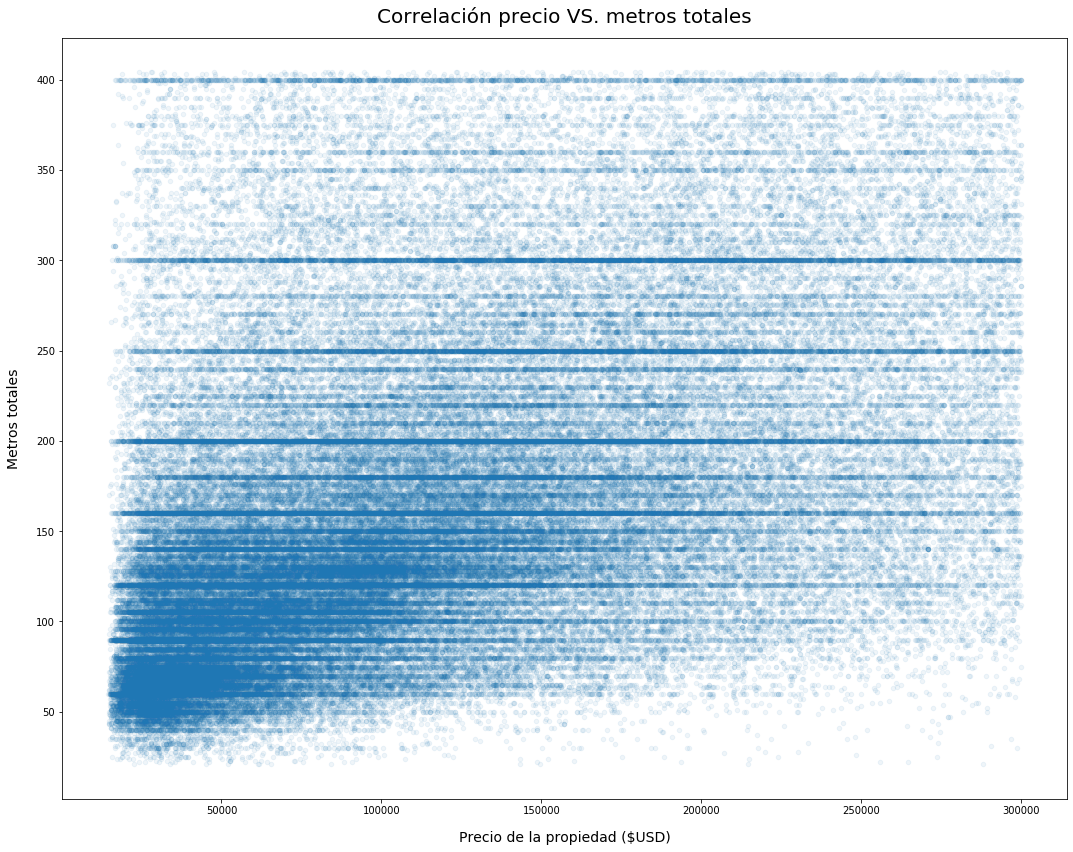

In [41]:
#Filtramos los datos para hacer al grafico apreciable
df_navent.loc[(df_navent['metrostotales'] > 20) & (df_navent['metrostotales'] < 405) & (df_navent['precio_usd'] < 300000),:]\
.plot.scatter(x='precio_usd',y='metrostotales',alpha=0.07,figsize= (18,14))
plt.title(u"Correlación precio VS. metros totales",pad=15,fontsize= 20)
plt.xlabel("Precio de la propiedad ($USD)",labelpad=15,fontsize=14) 
plt.ylabel("Metros totales",labelpad=15, fontsize=14)
plt.savefig('img/scatter_price_vs_metrostotales.png',bbox_inches = 'tight')
plt.show()

## Lat y lon con los recuperados

In [7]:
df_navent = pd.read_csv('data/trainBeforeRescueLatLong.csv', dtype={'tipodepropiedad':'category', 'ciudad':'category', 'provincia':'category', 'id':'int32', 'antiguedad':'float16', 'habitaciones':'float16', 'garages':'float16', 'banos':'float16', 'metroscubiertos':'float16', 'metrostotales':'float16', 'idzona':'float16', 'lat':'float16', 'lng':'float16', 'gimnasio':'bool', 'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool', 'centroscomercialescercanos':'bool'}, parse_dates=['fecha'])

In [8]:
precios_dolares = pd.read_csv('../data/precios_en_dolares.csv')

In [9]:
df_navent = df_navent.merge(precios_dolares, how='left')

In [10]:
del precios_dolares

In [152]:
# Extract the data we're interested in
lat = df_navent['lat'].values
lon = df_navent['lng'].values
precios = df_navent['precio_usd'].values

/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



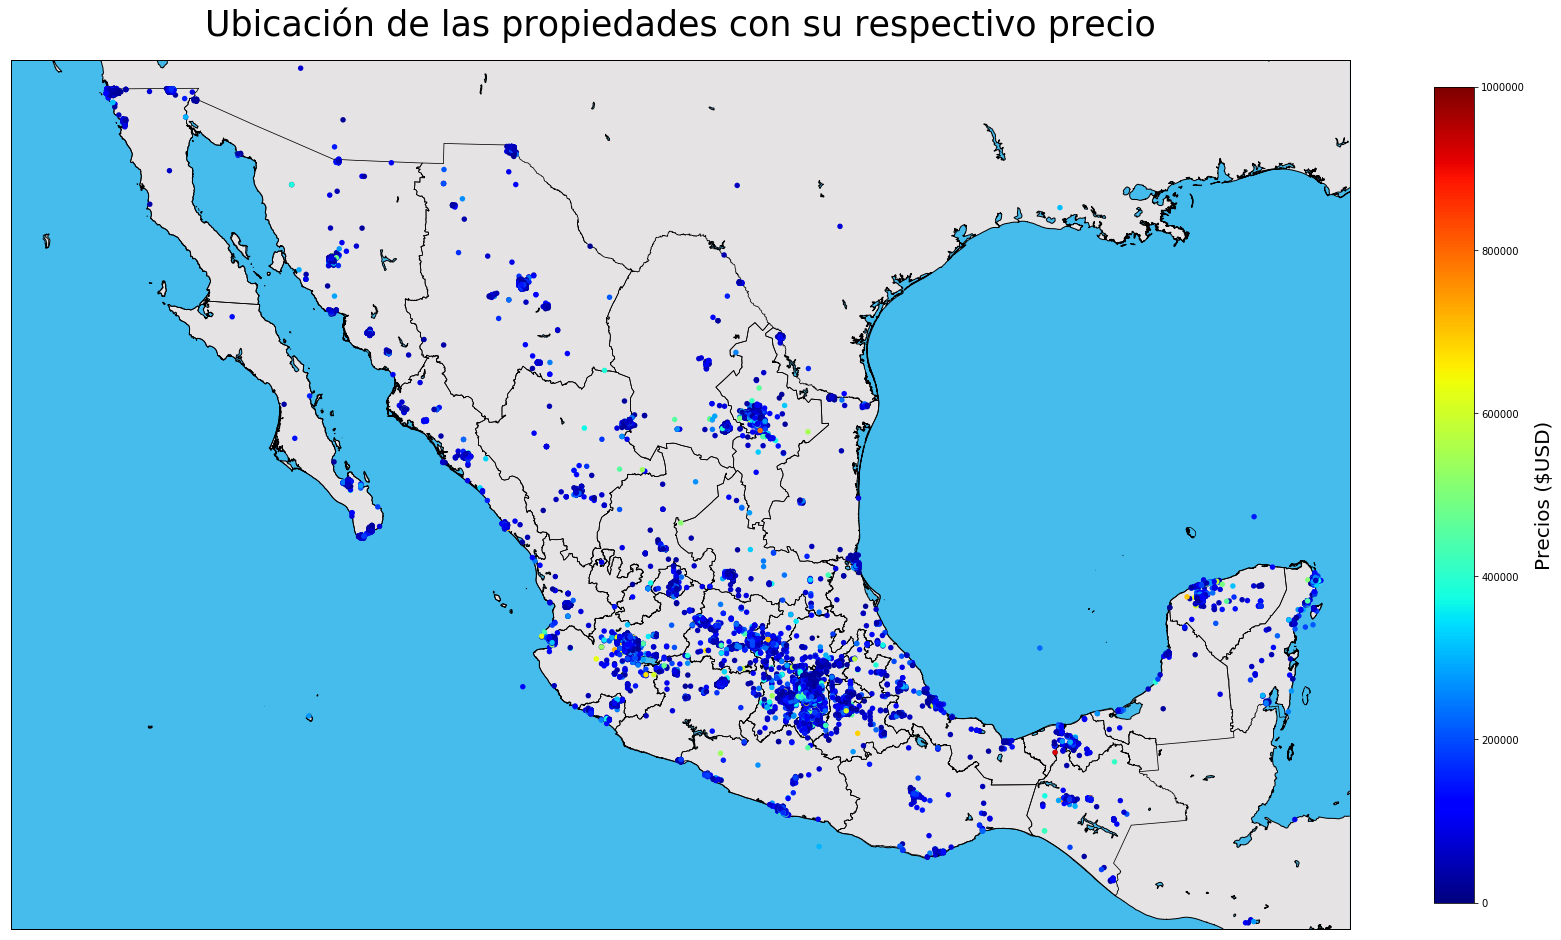

In [153]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)

mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8',zorder=1)
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

plt.title("Ubicación de las propiedades con su respectivo precio",fontsize=35, pad=25)
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = mexicoMap(lon, lat)
# Color the transformed points!
sc = plt.scatter(x,y, c=precios, vmin=0, vmax =1000000, cmap=jet, s=30, edgecolors='none',zorder=2)
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('Precio ($USD)',fontsize=20,labelpad=10)

plt.savefig('img/scatter_lat_lon_precio_usd.png',bbox_inches = 'tight')
plt.show()

## Lat y lon con datos de afuera

In [11]:
# Extract the data we're interested in
lat = df_navent['lat'].values
lon = df_navent['lng'].values
precios = df_navent['precio_usd'].values

El shapefile se obtiene de:
https://datos.cdmx.gob.mx/explore/dataset/lineas-de-metro/export/

/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


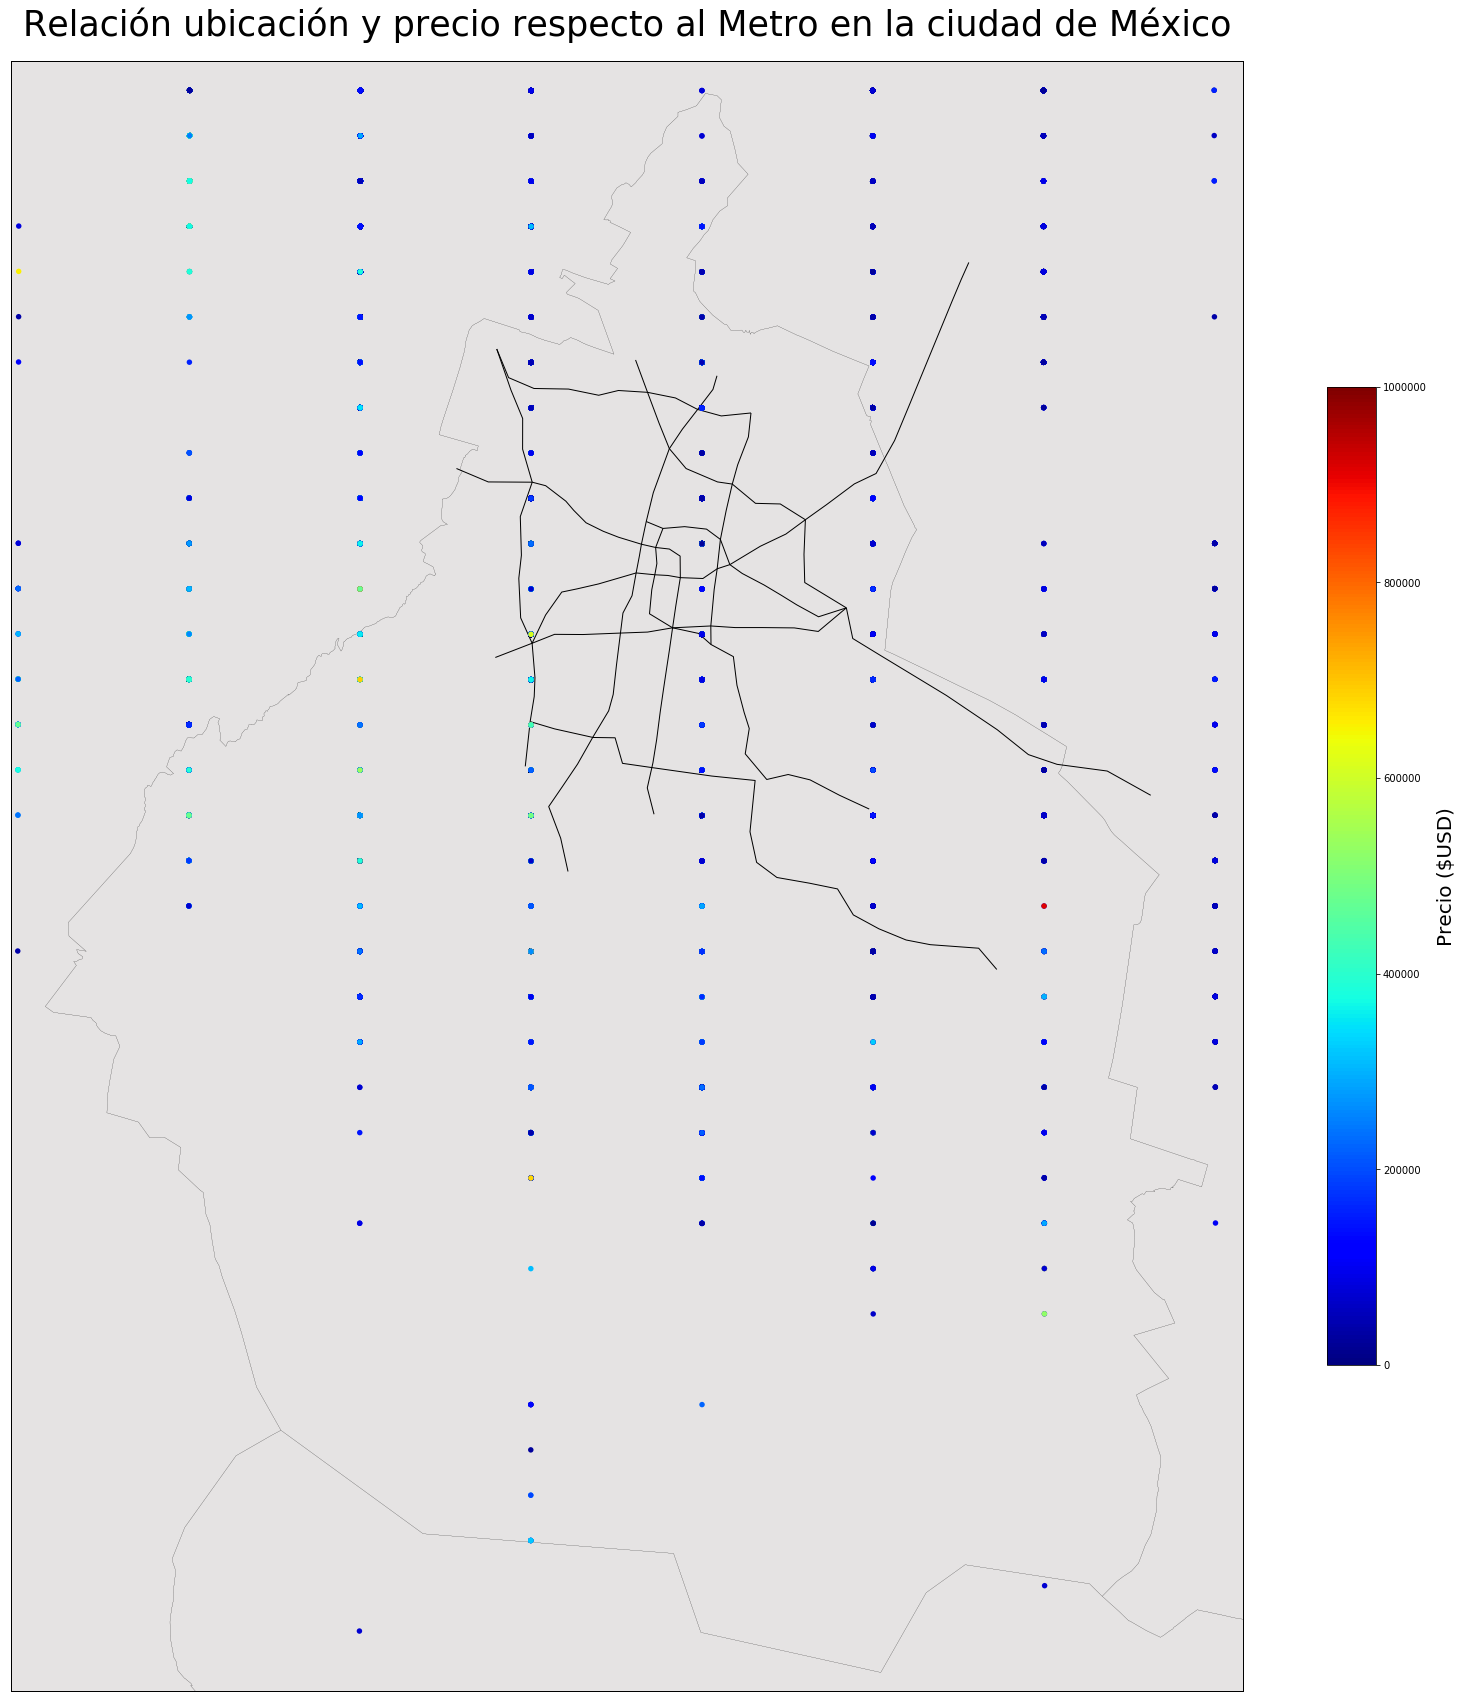

In [51]:
import warnings
warnings.filterwarnings(action='once')

westlimit=-99.3772
southlimit=19.0416
eastlimit=-98.9268
northlimit=19.604

lat_center = 19.406632
lon_center = -99.138270

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=lat_center, lon_0=lon_center,
            llcrnrlon=westlimit, llcrnrlat= southlimit, urcrnrlon=eastlimit, urcrnrlat=northlimit)

mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8',zorder=1)
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/lineas-de-metro/lineas-de-metro','shapefile',linewidth=1)
mexicoMap.readshapefile('data/shp/States/Mexican_States','shapefile',linewidth=.10)


plt.title("Relación ubicación y precio respecto al Metro en la ciudad de México",fontsize=35, pad=25)
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = mexicoMap(lon, lat)
# Color the transformed points!
sc = plt.scatter(x,y, c=precios, vmin=0, vmax =1000000, cmap=jet, s=30, edgecolors='none',zorder=2)
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .60)
cbar.set_label('Precio ($USD)',fontsize=20,labelpad=10)

plt.savefig('img/scatter_lat_lon_precio_usd_afuera.png',bbox_inches = 'tight')
plt.show()